# DATA PROCESSING

In [1]:
# Zaimportowanie paczek
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cut_tree
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import (DecisionTreeClassifier)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier)
from sklearn import metrics
from scipy import stats
from scipy.stats import zscore
from scipy.stats import chisquare
from sklearn.metrics import mean_squared_error,mean_absolute_error,f1_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, log_loss, brier_score_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.utils import resample
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

In [2]:
# Zaimportowanie danych
df=pd.read_csv('Loan_data.csv', delimiter=',')
df

C:\Users\Sylwia\AppData\Local\Temp\ipykernel_25104\2131515752.py:2: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Loan_data.csv', delimiter=',')


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501        NaN     5000.0       5000.0           4975.0   
1      1077430        NaN     2500.0       2500.0           2500.0   
2      1077175        NaN     2400.0       2400.0           2400.0   
3      1076863        NaN    10000.0      10000.0          10000.0   
4      1075358        NaN     3000.0       3000.0           3000.0   
...        ...        ...        ...          ...              ...   
42531    73582        NaN     3500.0       3500.0            225.0   
42532    72998        NaN     1000.0       1000.0              0.0   
42533    72176        NaN     2525.0       2525.0            225.0   
42534    71623        NaN     6500.0       6500.0              0.0   
42535    70686        NaN     5000.0       5000.0              0.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
42531   36 months   10.28%       113.39     C        C1  ...   
42532   36 months    9.64%        32.11     B        B4  ...   
42533   36 months    9.33%        80.69     B        B3  ...   
42534   36 months    8.38%       204.84     A        A5  ...   
42535   36 months    7.75%       156.11     A        A3  ...   

      hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                                NaN                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   
...                              ...                          ...   
42531                            NaN                          NaN   
42532                            NaN                          NaN   
42533                            NaN                          NaN   
42534                            NaN                          NaN   
42535                            NaN                          NaN   

      disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                    Cash                     N                       NaN   
1                    Cash                     N                       NaN   
2                    Cash                     N                       NaN   
3                    Cash                     N                       NaN   
4                    Cash                     N                       NaN   
...                   ...                   ...                       ...   
42531                Cash                     N                       NaN   
42532                Cash                     N                       NaN   
42533                Cash                     N                       NaN   
42534                Cash                     N                       NaN   
42535                Cash                     N                       NaN   

      settlement_status settlement_date settlement_amount  \
0                   NaN             NaN               NaN   
1                   NaN             NaN               NaN   
2                   NaN             NaN               NaN   
3                   NaN             NaN               NaN   
4                   NaN             NaN               NaN   
...                 ...             ...               ...   
42531               NaN             NaN               NaN   
42532               NaN             NaN               NaN   
42533               NaN             NaN               NaN   
42534               NaN             Na

In [3]:
# Usunięcie błędnych danych
Fin=df.iloc[:39786,:]
Fin

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501        NaN     5000.0       5000.0           4975.0   
1      1077430        NaN     2500.0       2500.0           2500.0   
2      1077175        NaN     2400.0       2400.0           2400.0   
3      1076863        NaN    10000.0      10000.0          10000.0   
4      1075358        NaN     3000.0       3000.0           3000.0   
...        ...        ...        ...          ...              ...   
39781    92187        NaN     2500.0       2500.0           1075.0   
39782    90665        NaN     8500.0       8500.0            875.0   
39783    90395        NaN     5000.0       5000.0           1325.0   
39784    90376        NaN     5000.0       5000.0            650.0   
39785    87023        NaN     7500.0       7500.0            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
39781   36 months    8.07%        78.42     A        A4  ...   
39782   36 months   10.28%       275.38     C        C1  ...   
39783   36 months    8.07%       156.84     A        A4  ...   
39784   36 months    7.43%       155.38     A        A2  ...   
39785   36 months   13.75%       255.43     E        E2  ...   

      hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                                NaN                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   
...                              ...                          ...   
39781                            NaN                          NaN   
39782                            NaN                          NaN   
39783                            NaN                          NaN   
39784                            NaN                          NaN   
39785                            NaN                          NaN   

      disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                    Cash                     N                       NaN   
1                    Cash                     N                       NaN   
2                    Cash                     N                       NaN   
3                    Cash                     N                       NaN   
4                    Cash                     N                       NaN   
...                   ...                   ...                       ...   
39781                Cash                     N                       NaN   
39782                Cash                     N                       NaN   
39783                Cash                     N                       NaN   
39784                Cash                     N                       NaN   
39785                Cash                     N                       NaN   

      settlement_status settlement_date settlement_amount  \
0                   NaN             NaN               NaN   
1                   NaN             NaN               NaN   
2                   NaN             NaN               NaN   
3                   NaN             NaN               NaN   
4                   NaN             NaN               NaN   
...                 ...             ...               ...   
39781               NaN             NaN               NaN   
39782               NaN             NaN               NaN   
39783               NaN             NaN               NaN   
39784               NaN             Na

In [4]:
# Sprawdzenie i usunięcie pustych wartości - całe kolumny
Fina=Fin.dropna(axis=1, how='all')
Fina

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1      1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2      1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3      1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4      1075358     3000.0       3000.0           3000.0   60 months   12.69%   
...        ...        ...          ...              ...         ...      ...   
39781    92187     2500.0       2500.0           1075.0   36 months    8.07%   
39782    90665     8500.0       8500.0            875.0   36 months   10.28%   
39783    90395     5000.0       5000.0           1325.0   36 months    8.07%   
39784    90376     5000.0       5000.0            650.0   36 months    7.43%   
39785    87023     7500.0       7500.0            800.0   36 months   13.75%   

       installment grade sub_grade                   emp_title  ... tax_liens  \
0           162.87     B        B2                         NaN  ...       0.0   
1            59.83     C        C4                       Ryder  ...       0.0   
2            84.33     C        C5                         NaN  ...       0.0   
3           339.31     C        C1         AIR RESOURCES BOARD  ...       0.0   
4            67.79     B        B5    University Medical Group  ...       0.0   
...            ...   ...       ...                         ...  ...       ...   
39781        78.42     A        A4             FiSite Research  ...       NaN   
39782       275.38     C        C1  Squarewave Solutions, Ltd.  ...       NaN   
39783       156.84     A        A4                         NaN  ...       NaN   
39784       155.38     A        A2                         NaN  ...       NaN   
39785       255.43     E        E2            Evergreen Center  ...       NaN   

      hardship_flag  disbursement_method debt_settlement_flag  \
0                 N                 Cash                    N   
1                 N                 Cash                    N   
2                 N                 Cash                    N   
3                 N                 Cash                    N   
4                 N                 Cash                    N   
...             ...                  ...                  ...   
39781             N                 Cash                    N   
39782             N                 Cash                    N   
39783             N                 Cash                    N   
39784             N                 Cash                    N   
39785             N                 Cash                    N   

      debt_settlement_flag_date settlement_status settlement_date  \
0                           NaN               NaN             NaN   
1                           NaN               NaN             NaN   
2                           NaN               NaN             NaN   
3                           NaN               NaN             NaN   
4                           NaN               NaN             NaN   
...                         ...               ...             ...   
39781                       NaN               NaN             NaN   
39782                       NaN               NaN             NaN   
39783                       NaN               NaN             NaN   
39784                       NaN               NaN             NaN   
39785                       NaN               NaN             NaN   

      settlement_amount settlement_percentage settlement_term  
0                   NaN                   NaN             NaN  
1                   NaN                   NaN             NaN  
2                   NaN                   NaN             NaN  
3                   NaN                   NaN             NaN  
4                   NaN                   NaN             NaN  
...                 ...                   ...             ...  
39781               

In [5]:
# Sprawdzenie i usunięcie kolumn zawierających więcej niż 80% pustych wartości
Final=Fina.dropna(axis=1, thresh=0.8*len(Fina))
Final

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1      1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2      1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3      1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4      1075358     3000.0       3000.0           3000.0   60 months   12.69%   
...        ...        ...          ...              ...         ...      ...   
39781    92187     2500.0       2500.0           1075.0   36 months    8.07%   
39782    90665     8500.0       8500.0            875.0   36 months   10.28%   
39783    90395     5000.0       5000.0           1325.0   36 months    8.07%   
39784    90376     5000.0       5000.0            650.0   36 months    7.43%   
39785    87023     7500.0       7500.0            800.0   36 months   13.75%   

       installment grade sub_grade                   emp_title  ...  \
0           162.87     B        B2                         NaN  ...   
1            59.83     C        C4                       Ryder  ...   
2            84.33     C        C5                         NaN  ...   
3           339.31     C        C1         AIR RESOURCES BOARD  ...   
4            67.79     B        B5    University Medical Group  ...   
...            ...   ...       ...                         ...  ...   
39781        78.42     A        A4             FiSite Research  ...   
39782       275.38     C        C1  Squarewave Solutions, Ltd.  ...   
39783       156.84     A        A4                         NaN  ...   
39784       155.38     A        A2                         NaN  ...   
39785       255.43     E        E2            Evergreen Center  ...   

      policy_code application_type  acc_now_delinq chargeoff_within_12_mths  \
0             1.0       Individual             0.0                      0.0   
1             1.0       Individual             0.0                      0.0   
2             1.0       Individual             0.0                      0.0   
3             1.0       Individual             0.0                      0.0   
4             1.0       Individual             0.0                      0.0   
...           ...              ...             ...                      ...   
39781         1.0       Individual             0.0                      NaN   
39782         1.0       Individual             0.0                      NaN   
39783         1.0       Individual             0.0                      NaN   
39784         1.0       Individual             0.0                      NaN   
39785         1.0       Individual             0.0                      NaN   

      delinq_amnt pub_rec_bankruptcies tax_liens hardship_flag  \
0             0.0                  0.0       0.0             N   
1             0.0                  0.0       0.0             N   
2             0.0                  0.0       0.0             N   
3             0.0                  0.0       0.0             N   
4             0.0                  0.0       0.0             N   
...           ...                  ...       ...           ...   
39781         0.0                  NaN       NaN             N   
39782         0.0                  NaN       NaN             N   
39783         0.0                  NaN       NaN             N   
39784         0.0                  NaN       NaN             N   
39785         0.0                  NaN       NaN             N   

      disbursement_method debt_settlement_flag  
0                    Cash                    N  
1                    Cash                    N  
2                    Cash                    N  
3                    Cash                    N  
4                    Cash                    N  
...                   ...                  ...  
39781                Cash                    N  
39782                Cash                    N  
39783          

In [6]:
# Sprawdznie typu kolumn w celu wyodrębnienia kolumn typu object - do dalszej modyfikacji bazy danych
Final.dtypes

id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_h

In [7]:
# Sprawdznie zawartości kolumn
Final.earliest_cr_line.value_counts()

Nov-1998    371
Oct-1999    366
Dec-1998    349
Oct-2000    346
Dec-1997    329
           ... 
Feb-1966      1
Dec-1961      1
Oct-1954      1
Jun-1972      1
Oct-1974      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [8]:
# Sprawdzenie unikalnych wartości poszczególnych kolumn
Final.earliest_cr_line.unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Jan-1996',
       'Nov-2004', 'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004',
       'Jan-1998', 'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007',
       'Oct-1998', 'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997',
       'Feb-1983', 'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002',
       'Aug-1984', 'Nov-2006', 'Dec-1987', 'Nov-1981', 'Feb-1997',
       'Apr-2005', 'Oct-2007', 'Dec-2000', 'Apr-2007', 'Dec-2001',
       'Jan-2003', 'Mar-1994', 'Sep-1998', 'Jun-2004', 'Nov-1995',
       'Jul-1999', 'Jun-1995', 'Sep-1992', 'Jan-2002', 'Apr-1992',
       'Oct-2006', 'May-2000', 'Dec-1998', 'Dec-2004', 'Oct-2000',
       'May-2002', 'May-2006', 'Jul-2002', 'Jul-2006', 'May-1997',
       'Oct-2005', 'Apr-1995', 'Oct-2002', 'Jan-2000', 'Apr-2000',
       'Dec-1994', 'Sep-2005', 'Dec-1984', 'Dec-1999', 'Nov-2003',
       'Jun-1989', 'Jun-2003', 'Oct-1996', 'May-2003', 'Jun-2002',
       'Jun-2007', 'Dec-1996', 'Feb-1984', 'Sep-2002', 'Jan-19

In [9]:
# Po powyższej analizie zawartości kolumn wyodrębniłam poniższe do usunięcia jako dane zbędne w analizie 
Final=Final.drop(['sub_grade','issue_d','emp_title','url','purpose','zip_code','addr_state','collection_recovery_fee','collections_12_mths_ex_med','pub_rec_bankruptcies','tax_liens','debt_settlement_flag'], axis=1)

In [10]:
# Usunięcie kolumna z danymi 'przyszłościowymi'
Final=Final.drop(['delinq_2yrs','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','last_fico_range_high','last_fico_range_low','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt'], axis=1)

In [11]:
# Usunięcie kolumn zawierających jedną daną
Final=Final.drop(['pymnt_plan','initial_list_status','application_type','policy_code','hardship_flag','disbursement_method'], axis=1)

In [12]:
Final.keys()

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'title', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'],
      dtype='object')

In [13]:
# Modyfikacja zawartości kolumn: term, grade, emp_lenght, home ownership, verification_status, loan_status. Zamiana na dane numeryczne:
Final.replace({'term':{' 36 months': 36, ' 60 months': 60},
               'grade':{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7},
               'emp_length':{'10+ years':10, '< 1 year':0.5, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9},
               'home_ownership':{'NONE': 0, 'OTHER': 0, 'RENT':1, 'MORTGAGE':2, 'OWN':3},
               'verification_status':{'Verified':2, 'Source Verified':1,'Not Verified':0},
               'loan_status':{'Fully Paid': 1, 'Charged Off': 0}}, inplace=True)

In [14]:
Final.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'title', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'],
      dtype='object')

In [15]:
# Uzupełnienie pustych miejsc w kolumnie 'title'
Final['title'].fillna('', inplace=True)

In [16]:
# Stworzenie nowej kolumny mówiącej o konsolidacji kredytu bazującej na danych z kolumny 'title'
Final['is_consolidation'] = Final['title'].str.contains('consolidation', case=False)

In [17]:
# Usunięcie nie potrzebnej już kolumny 'title':
Final=Final.drop('title', axis=1)

In [18]:
# Usunięcie znaku procentów z kolumny 'int_rate'
def Percent(val):
    result = float(val[:-1])
    return result

Final['int_rate']=Final['int_rate'].apply(Percent)

In [19]:
# Modyfikacja kolumny 'earliest_cr_line' tak, aby zawierała tylo rok udzielenie kredytu
def earliest_cr_line(val):
    result = int(val[4:])
    return result

Final['earliest_cr_line']=Final['earliest_cr_line'].apply(earliest_cr_line)

In [20]:
# Obliczenie wieku kredytowego - stworzonego w nowej kolumnie na podstawie kolumny 'earliest_cr_line' i po przyjęciu 2011 roku jako wyjściowego dla danej bazy danych.
Final['loan_age']=2011-Final['earliest_cr_line']

In [21]:
# Usunięcie nie potrzebnej już kolumny 'earliest_cr_line':
Final=Final.drop('earliest_cr_line', axis=1)

In [22]:
# Utworzenie 1 kolumny fico:
Final['fico']=(Final['fico_range_low']+Final['fico_range_high'])/2

In [23]:
# Usunięcie zbędnych kolumn 'fico_range_low' i 'fico_range_high':
Final=Final.drop(['fico_range_low','fico_range_high'], axis=1)

In [24]:
# Modyfikacja kolumny fico. Przyporządkowanie danych przedziałów wartości do konkretnej zmiennej odpowiadającej rankingowi FICO z załączonej tabeli:
def fico_stat(row):
    if row['fico'] <= 580:
        return 1
    elif row['fico']>=580 and row['fico']<=669:
        return 2
    elif row['fico']>=670 and row['fico']<=739:
        return 3
    elif row['fico']>=740 and row['fico']<=799:
        return 4
    return 5

Final['fico_status']=Final.apply(lambda row: fico_stat(row), axis=1)

In [25]:
# Sprawdzenie pustych wartośći:
Final.isnull().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1078
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
dti                       0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
total_acc                 0
is_consolidation          0
loan_age                  0
fico                      0
fico_status               0
dtype: int64

In [26]:
# Zastąpienie pustych wartości w kolumnie 'emp_length':
Final['emp_length'].fillna(0, inplace=True)

In [27]:
# Uporządkowanie kolumn:
names=['id','loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','term','installment','int_rate','loan_age','inq_last_6mths','verification_status','dti','grade','fico','fico_status','revol_bal','total_acc','open_acc','is_consolidation','emp_length','home_ownership','pub_rec','loan_status']
Final=Final[names]

In [28]:
Final['is_consolidation']=Final['is_consolidation'].astype(int)

In [29]:
Final['id']=Final['id'].astype(int)

    Atrybuty:
    id
    loan_amnt: wnioskowany kredyt
    funded_amnt: przyznany kredyt
    funded_amnt_inv: wkład inwestorów w pożyczkę
    annual_inc: zgłoszony roczny dochód
    term: termin pożyczki: 36-36mcy, 60-60mcy
    installment: miesięczna rata
    int_rate: oprocentowanie, % domyślnie
    loan_age: wiek kredytowy
    inq_last_6mths: zapytania kredytowe z ostatnich 6mcy
    verification_status: 0-Niezweryfikowany, 1-Częściowo zweryfikowany, 2-Zweryfikowany
    dti: wsółczynnik całkowitych spłat do całkowitych zobowiązań dzielony przez miesięczny dochód wnioskującego
    grade: rating wg LC: 1-A, 2-B, 3-C, 4-D, 5-E, 6-F, 7-G
    fico: ogólny rating kredytowy
    fico_status: 1-Poor <580, 2-Fair 580-669, 3-Good 670-739, 4-Very Good 740-799, 5-Exceptional >800
    revol_bal: całkowite odnawialne saldo kredytu
    total_acc: ilość wszystkich linii kredytowych pożyczkobiorcy
    open_acc: ilość otwartych linii kredytowych pożyczkobiorcy
    is_consolidation: czy kredyt jest konsolidacyjny: 1-tak, 0-nie
    emp_length: długość zatrudnienia w latach, gdzie 10 to też 10+
    home_ownership: własność domu: 0-brak/inne, 1-wynajem, 2-kredyt, 3-własnościowe
    pub_rec: liczba uwłaczających rejestrów publicznych
    loan_status: stan kredytu: 1-Spłacony, 0-Niespłacony

# EDA

In [30]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39786 non-null  int32  
 1   loan_amnt            39786 non-null  float64
 2   funded_amnt          39786 non-null  float64
 3   funded_amnt_inv      39786 non-null  float64
 4   annual_inc           39786 non-null  float64
 5   term                 39786 non-null  int64  
 6   installment          39786 non-null  float64
 7   int_rate             39786 non-null  float64
 8   loan_age             39786 non-null  int64  
 9   inq_last_6mths       39786 non-null  float64
 10  verification_status  39786 non-null  int64  
 11  dti                  39786 non-null  float64
 12  grade                39786 non-null  int64  
 13  fico                 39786 non-null  float64
 14  fico_status          39786 non-null  int64  
 15  revol_bal            39786 non-null 

In [31]:
Final.describe()

id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  3.978600e+04  39786.000000  39786.000000     39786.000000   
mean   6.833939e+05  11231.360277  10958.722289     10409.134336   
std    2.106770e+05   7464.542832   7194.076908      7135.661270   
min    5.473400e+04    500.000000    500.000000         0.000000   
25%    5.163518e+05   5500.000000   5400.000000      5000.000000   
50%    6.662295e+05  10000.000000   9650.000000      8975.000000   
75%    8.378710e+05  15000.000000  15000.000000     14400.000000   
max    1.077501e+06  35000.000000  35000.000000     35000.000000   

         annual_inc          term   installment      int_rate      loan_age  \
count  3.978600e+04  39786.000000  39786.000000  39786.000000  39786.000000   
mean   6.897907e+04     42.448499    324.733637     12.027873     14.440733   
std    6.376263e+04     10.638782    208.923212      3.727466      6.826294   
min    4.000000e+03     36.000000     15.690000      5.420000      3.000000   
25%    4.050000e+04     36.000000    167.080000      9.250000     10.000000   
50%    5.900000e+04     36.000000    280.610000     11.860000     13.000000   
75%    8.234250e+04     60.000000    430.780000     14.590000     18.000000   
max    6.000000e+06     60.000000   1305.190000     24.590000     65.000000   

       inq_last_6mths  ...          fico   fico_status      revol_bal  \
count    39786.000000  ...  39786.000000  39786.000000   39786.000000   
mean         0.869049  ...    716.997989      3.208641   13391.983914   
std          1.070069  ...     35.840682      0.590552   15894.635107   
min          0.000000  ...    627.000000      2.000000       0.000000   
25%          0.000000  ...    687.000000      3.000000    3704.250000   
50%          1.000000  ...    712.000000      3.000000    8859.500000   
75%          1.000000  ...    742.000000      4.000000   17065.000000   
max          8.000000  ...    827.000000      5.000000  149588.000000   

          total_acc      open_acc  is_consolidation    emp_length  \
count  39786.000000  39786.000000      39786.000000  39786.000000   
mean      22.090308      9.294023          0.222490      4.897250   
std       11.401620      4.399997          0.415924      3.531315   
min        2.000000      2.000000          0.000000      0.000000   
25%       13.000000      6.000000          0.000000      2.000000   
50%       20.000000      9.000000          0.000000      4.000000   
75%       29.000000     12.000000          0.000000      9.000000   
max       90.000000     44.000000          1.000000     10.000000   

       home_ownership       pub_rec   loan_status  
count    39786.000000  39786.000000  39786.000000  
mean         1.596441      0.055145      0.857488  
std          0.632306      0.237653      0.349579  
min          0.000000      0.000000      0.000000  
25%          1.000000      0.000000      1.000000  
50%          2.000000      0.000000      1.000000  
75%          2.000000      0.000000      1.000000  
max          3.000000      4.000000      1.000000  

[8 rows x 23 columns]

# PRZEDSTAWIENIE DANYCH NA WYKRESACH W CELU LEPSZEGO ZROZUMIENIA

I. Wykres kołowy przedstawiający proporcję spłaconych zobowiązań do nie spłaconych

In [32]:
Final.loan_status.value_counts().to_frame()

loan_status
1        34116
0         5670

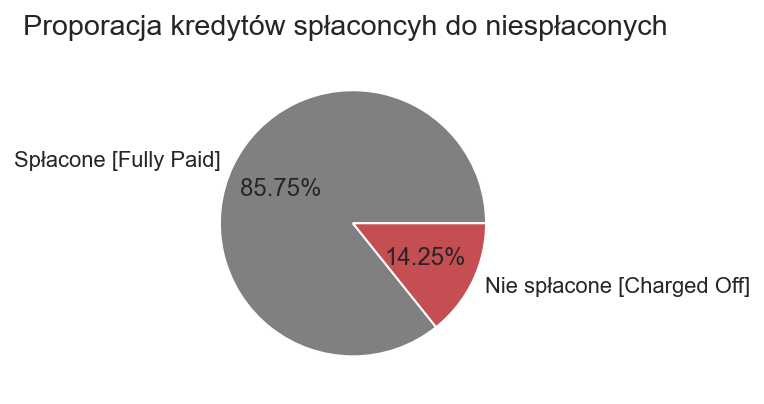

In [33]:
fig = plt.figure(figsize=(4,3),dpi=144)
ax = fig.add_subplot(111)
plt.suptitle('Proporacja kredytów spłaconcyh do niespłaconych')

cts = Final.loan_status.value_counts().to_frame()
ax.pie(cts.loan_status,  autopct = '%1.2f%%', labels=['Spłacone [Fully Paid]','Nie spłacone [Charged Off]'], colors=['grey','r'])
plt.show()

    KOMENTARZ:
    Wykresy kołowe przy dużej ilości danych często są nieprecyzyjne ze względu na złudzenie optyczne. Przy dwóch danych jednak widać, że analizowane dane zdecydowanie dzielą się na w większości spłacone zobowiązania i mniej niż 25% nie spłaconych.


II. Heat mapa wszystkich danych w celu sprawdzenia nie widocznych zależności:

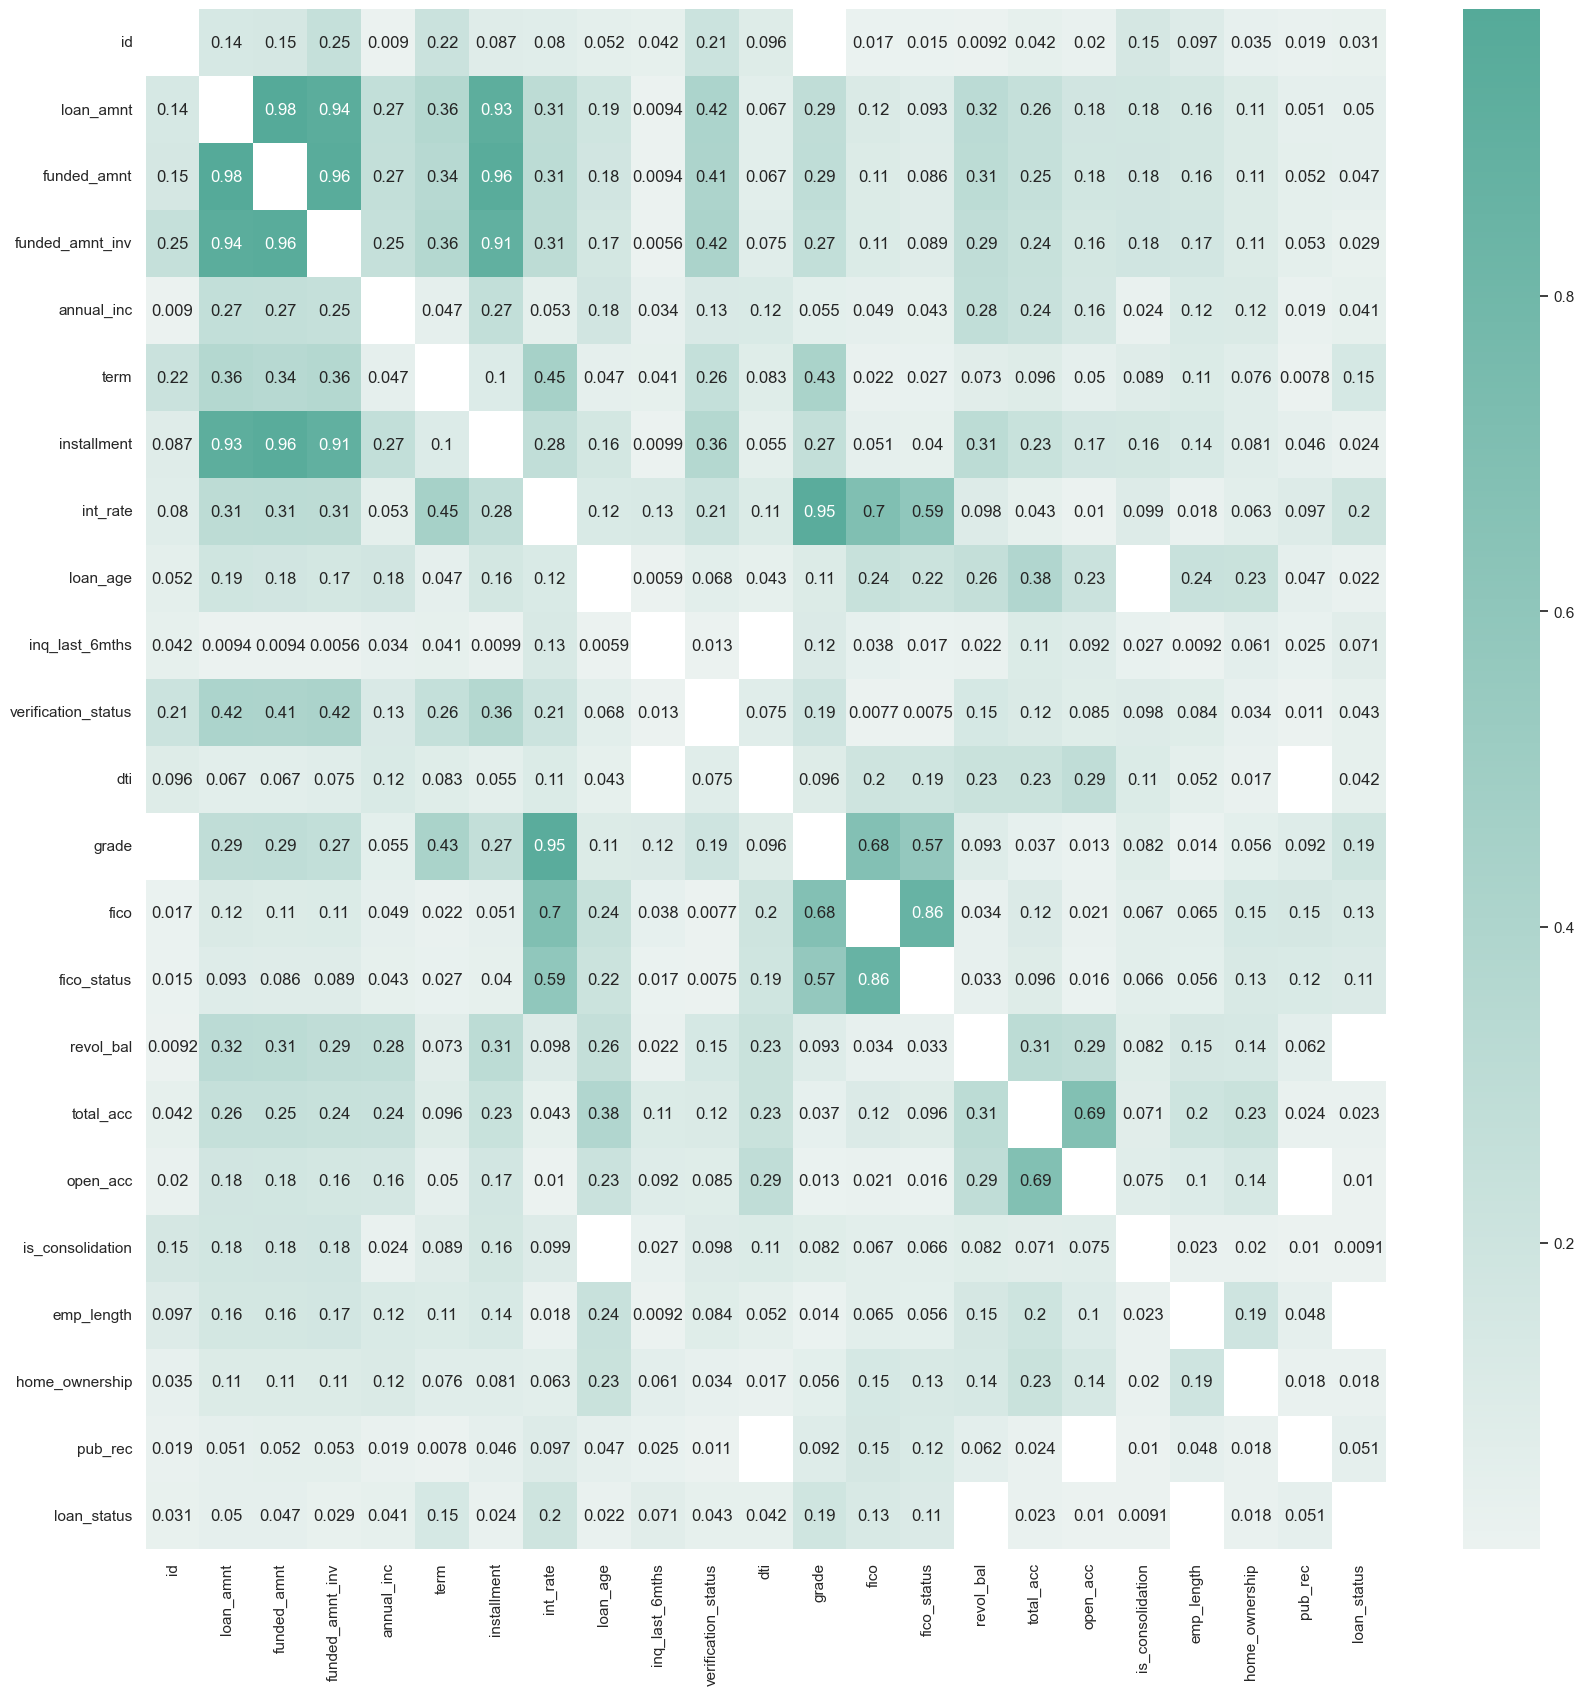

In [34]:
Final_corr_matrix = Final.corr().abs()
threshold = 0.005
filtered_corr_Final = Final_corr_matrix[(Final_corr_matrix >= threshold) & (Final_corr_matrix != 1.000)] 

cmap=sns.color_palette("light:#5A9", as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(filtered_corr_Final, annot=True, cmap=cmap)
plt.show()

    KOMENTARZ:
    Wygenerowana heatmapa poza oczywistym powiązaniem pomiędzy kwotami kredytu - wnioskowanymi i przynanymi - pokazuje dosyć widocznie zależności pomiędzy danymi stopniującymi potencjalnego klienta, a wysokością nałożonego na zobowiązanie oprocentownia. Kolumny klasyfikujące potencjalnego pożyczkobiorcę, tj. GRADE, FICO, FICO_STATUS wiążą się z INT_RATE.
    Ciekawostką jest fakt, że kolumna świadcząca o własności domu nie ma zbyt dużego powiązania z wysokością raty (installment), oprocentowania (int_rate) czy z samym paramentrem lan_status odpowiadającym za spłacenie kredytu.

III. Wykres słupkowy pokazujący najwięcej zaciągniętych zobowiązań w danej grupie ratingowej 'FICO'

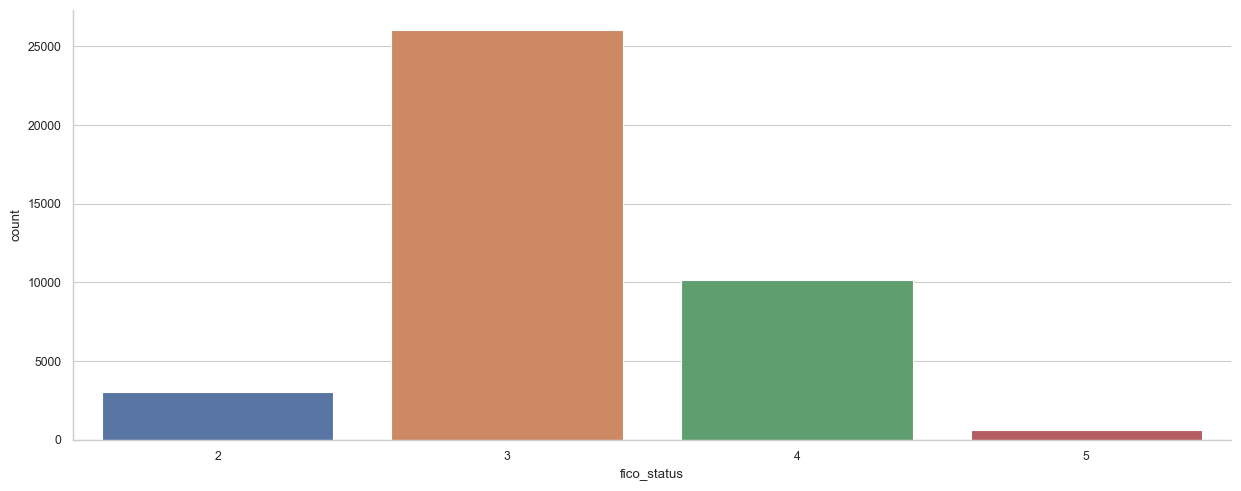

In [35]:
sns.set_context('paper')
sns.catplot(x='fico_status', 
            data=Final, 
            aspect=2.5, 
            kind='count')
plt.show()

    KOMENTARZ:
    Wykres widocznie pokazuje, że największą grupą z przyznanym kredytem stanowi grupa mieszcząca sie w środkowym przedziale FICO.
    Dane nie zawierają ani jednego zobowiązania przyznanego osobie w najniższej grupie ratingu fico, tzw. 'POOR' <580 punktów.

IV. Wykres przedstawiający rozkład przyznanych zobowiązań wg wartości oprocentowania kredytu w stosunku do przyznanego przez Lending Club ratingu (grade) z podziałem na informację czy dochód został przez Lending Club zweryfikowany czy nie.

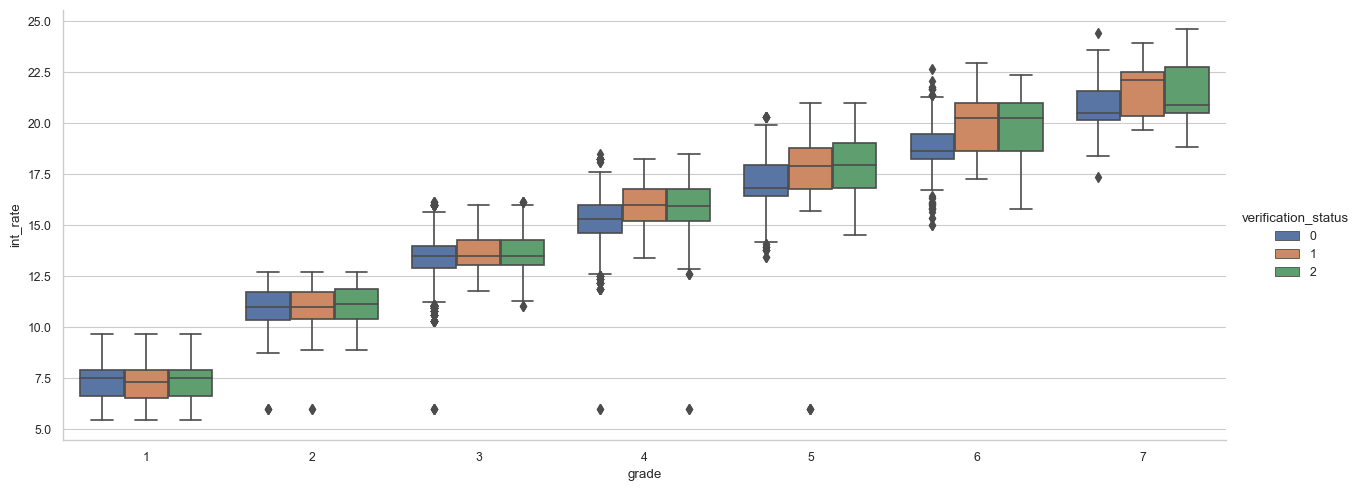

In [36]:
sns.catplot(x='grade',
            y='int_rate', 
            aspect=2.5, 
            data=Final,
            kind='box',
            hue='verification_status')
plt.show()

    KOMENTARZ:
    Na podstawie powyższego wykresu widać, że im wyższa grupa ratingowa przyznawana przez Lending Club tym wyższe oprocentowanie przyznanego kredytu. Oznaczałoby to, że - w przeciwieństwie do ratingu FICO - im wyższa wartość GRADE tym mniej wypłacalny i wiarygodny klient.
    W wyższych grupach (GRADE 5,6,7) widać także, że pożyczki udzielone bez weryfikacji (wartość 0) cechują sie większymi rozbieżnościami danych wg oprocentowania przyznanych pożyczek niż pożyczki częściowo zweryfikowane (wartość 1) i zweryfikowane (wartość 2). Oznaczałoby, to, że  na wysokość oprocentowania pożyczki nie zweryfikowanej większy wpływ mają inne dane z tabeli niż poziom przyznanego ratingu przez LC.

V. Analiza boxplotów w celu wyodrębnienia kolumn, w których trzeba usunąć outliersy 

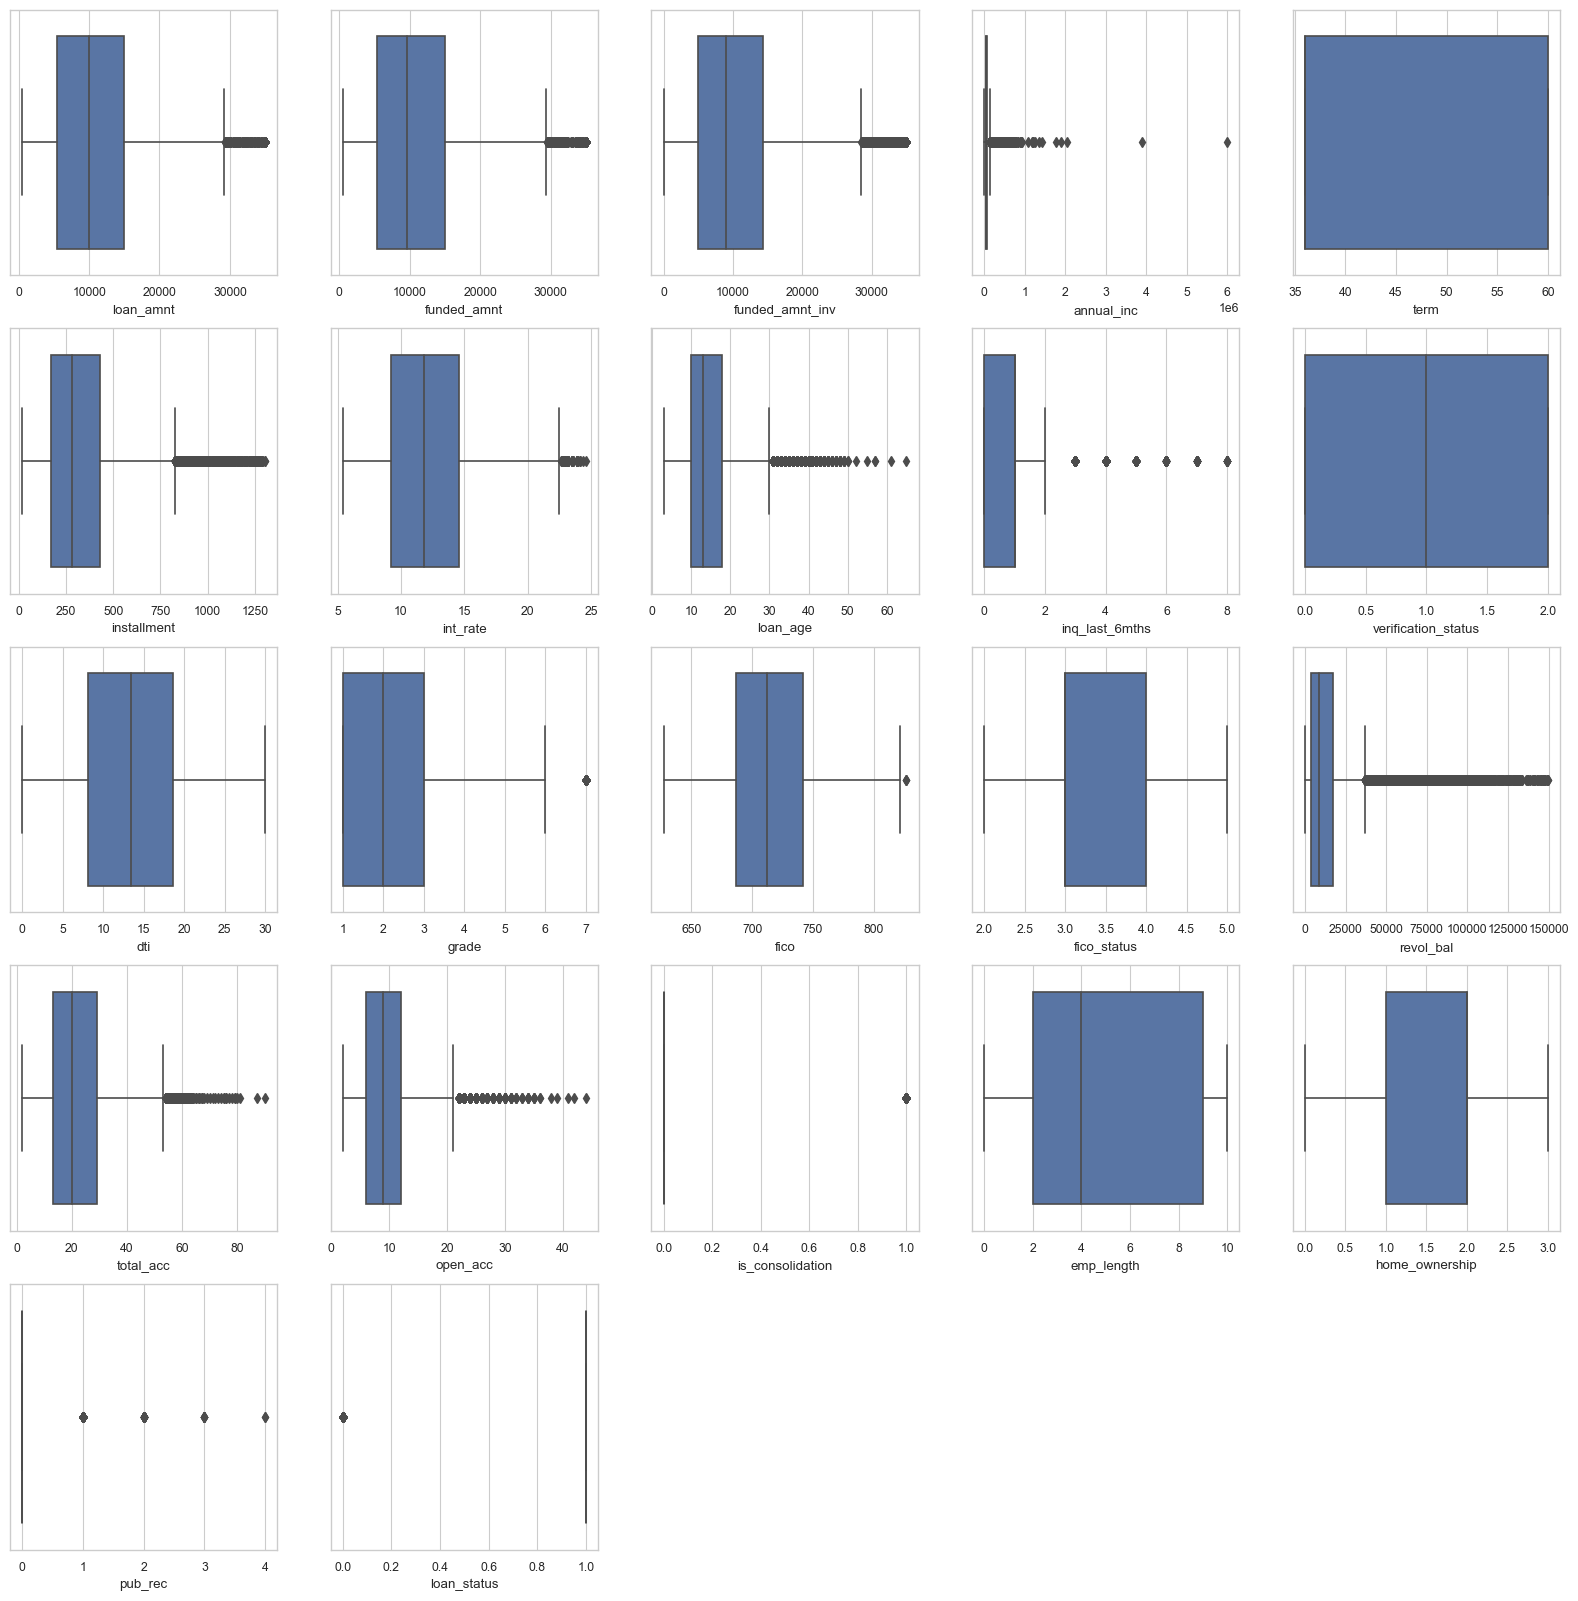

In [37]:
plt.figure(figsize=(20,20), dpi=100)

for i in range (1, len(Final.columns)):
    plt.subplot(5,5,i)
    sns.boxplot(x=Final.columns[i], data=Final)

    KOMENTARZ:
    -kolumny w których znikną outliersy są to głównie kolumny zawierające kwoty
    -widać także, że ta metoda nie usunie danych w przypadku kolumn stopniujących True-False/1-0 lub z niewieloma zmiennymi wartościującymi: term, fico_status, home_ownership pub_rec

# ANALIZA DANYCH POTRZEBNYCH DO ODPOWIEDZI NA PYTANIA

Loan_status

In [38]:
print('Zakres wartości: ', Final['loan_status'].max()-Final['loan_status'].min())
print('Minimalna wartość: ', Final['loan_status'].min())
print('Maksymalna wartość: ',Final['loan_status'].max())
print('Średnia wartość: ', round(Final['loan_status'].mean(),2))
print('Mediana: ',Final['loan_status'].median())
print('Odchylenie standardowe: ', round(Final['loan_status'].std(),2))

Zakres wartości:  1
Minimalna wartość:  0
Maksymalna wartość:  1
Średnia wartość:  0.86
Mediana:  1.0
Odchylenie standardowe:  0.35


FICO

In [39]:
print('Zakres wartości: ', Final['fico'].max()-Final['fico'].min())
print('Minimalna wartość: ', Final['fico'].min())
print('Maksymalna wartość: ',Final['fico'].max())
print('Średnia wartość: ', round(Final['fico'].mean(),2))
print('Mediana: ',Final['fico'].median())
print('Odchylenie standardowe: ', round(Final['fico'].std(),2))

Zakres wartości:  200.0
Minimalna wartość:  627.0
Maksymalna wartość:  827.0
Średnia wartość:  717.0
Mediana:  712.0
Odchylenie standardowe:  35.84


FICO_status

In [40]:
print('Zakres wartości: ', Final['fico_status'].max()-Final['fico_status'].min())
print('Minimalna wartość: ', Final['fico_status'].min())
print('Maksymalna wartość: ',Final['fico_status'].max())
print('Średnia wartość: ', round(Final['fico_status'].mean(),2))
print('Mediana: ',Final['fico_status'].median())
print('Odchylenie standardowe: ', round(Final['fico_status'].std(),2))

Zakres wartości:  3
Minimalna wartość:  2
Maksymalna wartość:  5
Średnia wartość:  3.21
Mediana:  3.0
Odchylenie standardowe:  0.59


Loan_age

In [41]:
print('Zakres wartości: ', Final['loan_age'].max()-Final['loan_age'].min())
print('Minimalna wartość: ', Final['loan_age'].min())
print('Maksymalna wartość: ',Final['loan_age'].max())
print('Średnia wartość: ', round(Final['loan_age'].mean(),2))
print('Mediana: ',Final['loan_age'].median())
print('Odchylenie standardowe: ', round(Final['loan_age'].std(),2))

Zakres wartości:  62
Minimalna wartość:  3
Maksymalna wartość:  65
Średnia wartość:  14.44
Mediana:  13.0
Odchylenie standardowe:  6.83


Home_ownership

In [42]:
print('Zakres wartości: ', Final['home_ownership'].max()-Final['home_ownership'].min())
print('Minimalna wartość: ', Final['home_ownership'].min())
print('Maksymalna wartość: ',Final['home_ownership'].max())
print('Średnia wartość: ', round(Final['home_ownership'].mean(),2))
print('Mediana: ',Final['home_ownership'].median())
print('Odchylenie standardowe: ', round(Final['home_ownership'].std(),2))

Zakres wartości:  3
Minimalna wartość:  0
Maksymalna wartość:  3
Średnia wartość:  1.6
Mediana:  2.0
Odchylenie standardowe:  0.63


Annual_inc

In [43]:
print('Zakres wartości: ', Final['annual_inc'].max()-Final['annual_inc'].min())
print('Minimalna wartość: ', Final['annual_inc'].min())
print('Maksymalna wartość: ',Final['annual_inc'].max())
print('Średnia wartość: ', round(Final['annual_inc'].mean(),2))
print('Mediana: ',Final['annual_inc'].median())
print('Odchylenie standardowe: ', round(Final['annual_inc'].std(),2))

Zakres wartości:  5996000.0
Minimalna wartość:  4000.0
Maksymalna wartość:  6000000.0
Średnia wartość:  68979.07
Mediana:  59000.0
Odchylenie standardowe:  63762.63


Emp_length

In [44]:
print('Zakres wartości: ', Final['emp_length'].max()-Final['emp_length'].min())
print('Minimalna wartość: ', Final['emp_length'].min())
print('Maksymalna wartość: ',Final['emp_length'].max())
print('Średnia wartość: ', round(Final['emp_length'].mean(),2))
print('Mediana: ',Final['emp_length'].median())
print('Odchylenie standardowe: ', round(Final['emp_length'].std(),2))

Zakres wartości:  10.0
Minimalna wartość:  0.0
Maksymalna wartość:  10.0
Średnia wartość:  4.9
Mediana:  4.0
Odchylenie standardowe:  3.53


Loan_amnt

In [45]:
print('Zakres wartości: ', Final['loan_amnt'].max()-Final['loan_amnt'].min())
print('Minimalna wartość: ', Final['loan_amnt'].min())
print('Maksymalna wartość: ',Final['loan_amnt'].max())
print('Średnia wartość: ', round(Final['loan_amnt'].mean(),2))
print('Mediana: ',Final['loan_amnt'].median())
print('Odchylenie standardowe: ', round(Final['loan_amnt'].std(),2))

Zakres wartości:  34500.0
Minimalna wartość:  500.0
Maksymalna wartość:  35000.0
Średnia wartość:  11231.36
Mediana:  10000.0
Odchylenie standardowe:  7464.54


<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

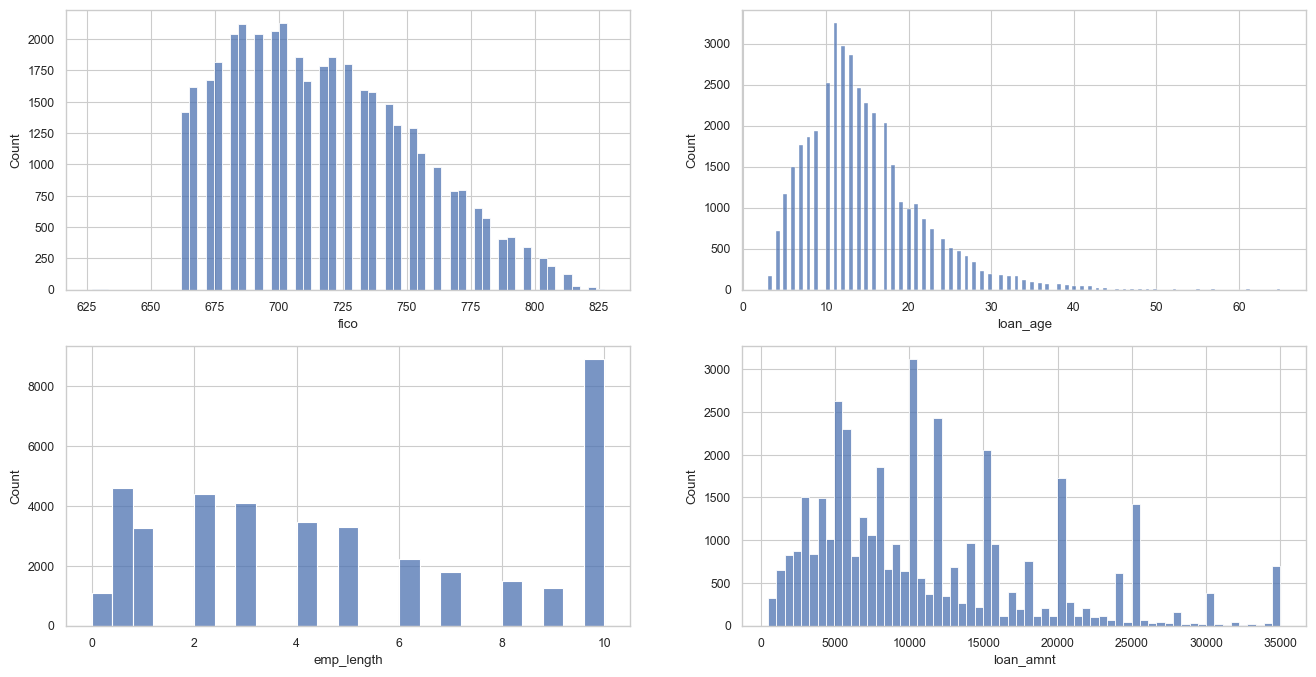

In [46]:
# Przedstawienie wybranych danych na wykresach, żeby zobrazować jak wartościowo rozkłada się większość danych
fig, ax2 = plt.subplots(2, 2, figsize=(16, 8))
sns.histplot(Final['fico'],ax=ax2[0][0])
sns.histplot(Final['loan_age'],ax=ax2[0][1])
sns.histplot(Final['emp_length'],ax=ax2[1][0])
sns.histplot(Final['loan_amnt'],ax=ax2[1][1])


    Fico - najwięcej jest kredytów udzielonych w przedziałach 675-740 rankingu fico
    Loan_age - Najwięcej kredytów udzielono klientom z wiekiem kredytowym w przedziele 5-25 lat
    Emp_length - wyraźnie widac przewagę klientów z długim stażem zatrudnienia w stosunku do pozostałych historii zatrudnienia (w latach)
    Loan_amnt - najwięcej udzielono niewielkich pożyczek do 10-12 tysięcy

# ODPOWIEDZI NA PYTANIA Z ZADANIA:

I. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

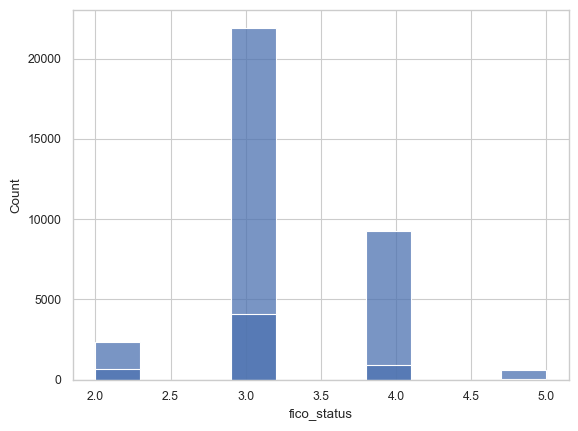

In [47]:
sns.histplot(Final[Final['loan_status']==1]['fico_status'], bins=10, kde_kws={"label": "Spłacona"})
sns.histplot(Final[Final['loan_status']==0]['fico_status'], bins=10, kde_kws={"label": "Niespłacona"})
plt.show()

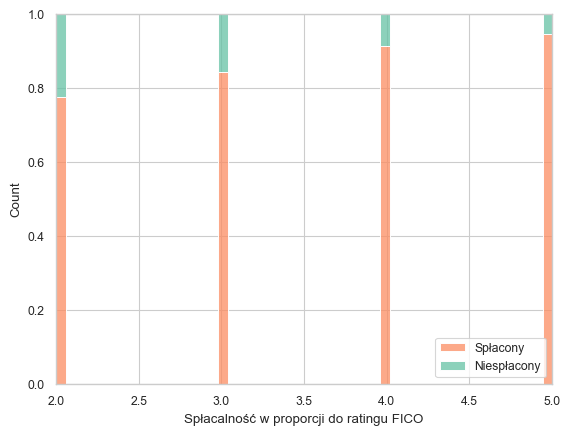

In [48]:
sns.histplot(data=Final, x='fico_status', hue='loan_status', multiple='fill', palette='Set2')
plt.xlabel('Spłacalność w proporcji do ratingu FICO')
plt.legend(loc=4, labels=['Spłacony','Niespłacony'])

    Na podstawie pierwszego wykresu możemy się dowiedzieć, że najwięcej pożyczek zostało udzielonych klientom z ratingiem oznaczonym jako '3' ('Good'). Jednak ilość udzielonych kredytów, a ich procent spłacalności w zakresie danej klasyfikacji pokazuje nam wykres drugi. Widać na nim, że im lepszy wynik ratingowy przy udzieleniu pożyczki tym lepsza spłacalność zobowiązania

II. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO?

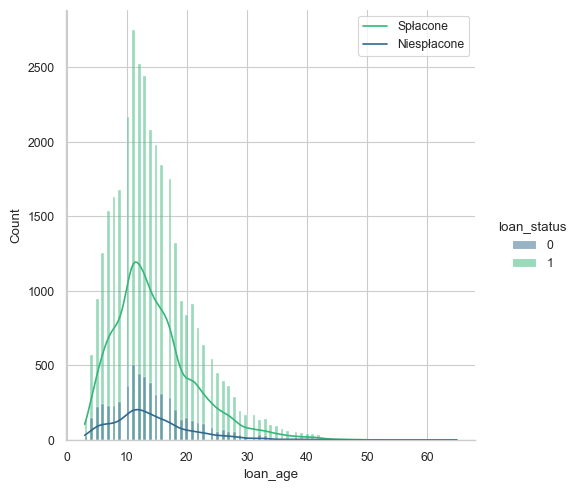

In [49]:
sns.displot(Final,
            x = 'loan_age',
            kde = True,
            hue = 'loan_status',
            palette = 'viridis')
plt.legend(labels=['Spłacone','Niespłacone'])

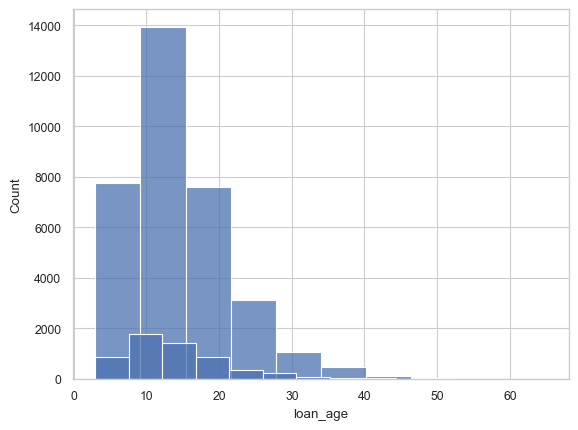

In [50]:
sns.histplot(Final[Final['loan_status']==1]['loan_age'], bins=10, kde_kws={"label": "Spłacona"})
sns.histplot(Final[Final['loan_status']==0]['loan_age'], bins=10, kde_kws={"label": "Niespłacona"})
plt.show()

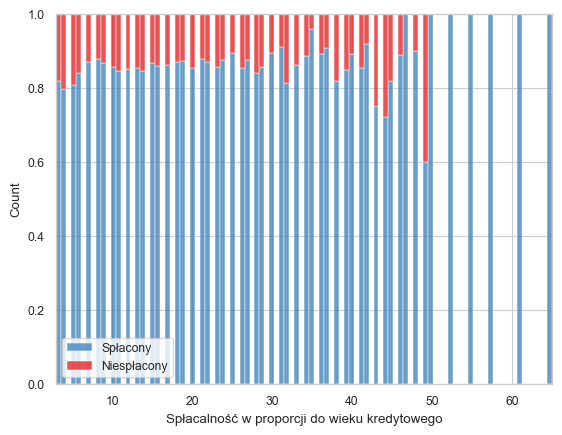

In [51]:
sns.histplot(data=Final, x='loan_age', hue='loan_status', bins=100, multiple='fill', palette='Set1')
plt.xlabel('Spłacalność w proporcji do wieku kredytowego')
plt.legend(loc=3, labels=['Spłacony','Niespłacony'])

        Dwa powyższe wykresy pokazują, że najwięcej pożyczek zostało zaciągniętych przez klientów z wiekiem kredytowym pomiędzy 5, a 20 lat. Jednak jeśli chodzi o spłacalność praktycznie do 50 lat wg wieku kredytowego poziom spłacalności wiele się nie różni. Dopiero klienci powyżej 50lat liczonych w wieku kredytowym całkowicie spłacają zaciągnięte zobowiązania.

III. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

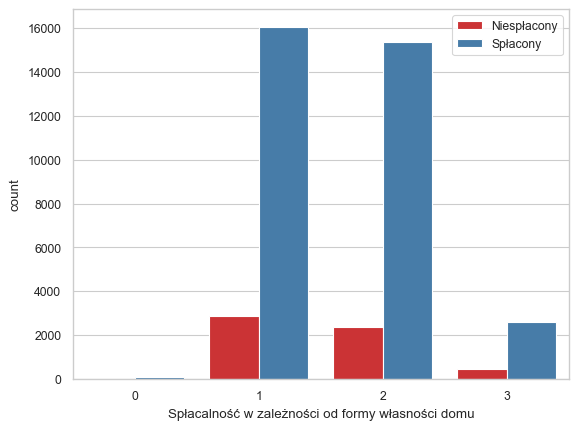

In [52]:
sns.countplot(data=Final, x='home_ownership', hue='loan_status', palette='Set1')
plt.xlabel('Spłacalność w zależności od formy własności domu')
plt.legend(loc='upper right', labels=['Niespłacony','Spłacony'])

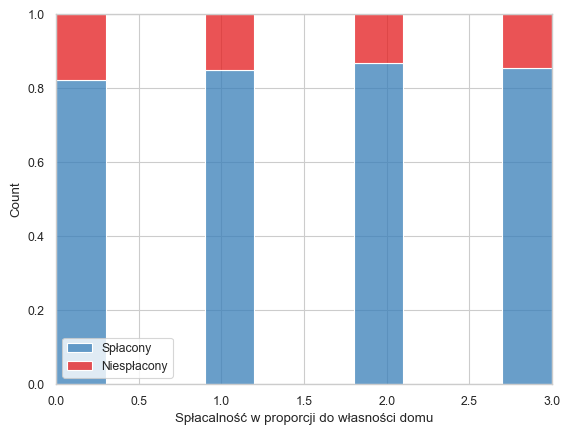

In [53]:
sns.histplot(data=Final, x='home_ownership', hue='loan_status', bins=10, multiple='fill', palette='Set1')
plt.xlabel('Spłacalność w proporcji do własności domu')
plt.legend(loc=3, labels=['Spłacony','Niespłacony'])

    Status kredytu hipotecznego na dom nie ma związku z prawdopodobieństwem spłacalności zaciągniętych zobowiązań.

IV. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

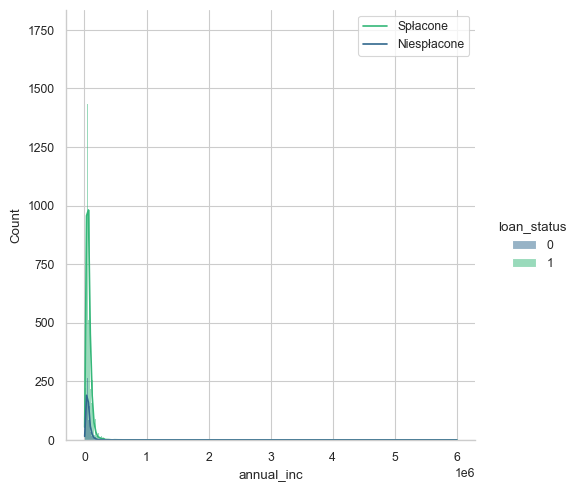

In [54]:
sns.displot(Final,
            x = 'annual_inc',
            kde = True,
            hue = 'loan_status',
            palette = 'viridis')
plt.legend(labels=['Spłacone','Niespłacone'])

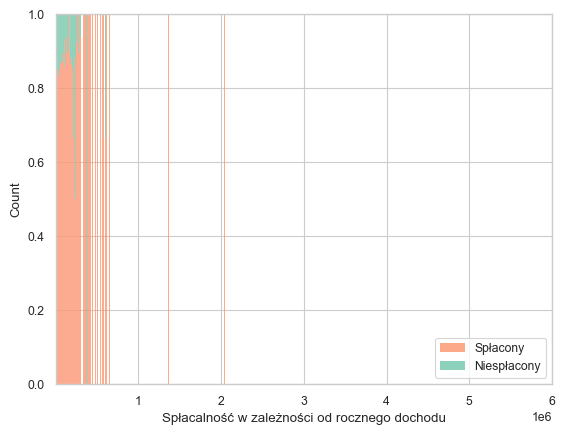

In [55]:
sns.histplot(data=Final, x='annual_inc', hue='loan_status', multiple='fill', palette='Set2')
plt.xlabel('Spłacalność w zależności od rocznego dochodu')
plt.legend(loc=4, labels=['Spłacony','Niespłacony'])

    Na powyższych wykresach możemy zaobserwować, że najwięcej niespłaconych zobowiązań znajduje się w początkowych przedziałach zadeklarowanych zarobków, czyli im mniejszy zadeklarowany roczny dochód tym większe prawdopodobieństwo nie spłacenia zobowiązania

V. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

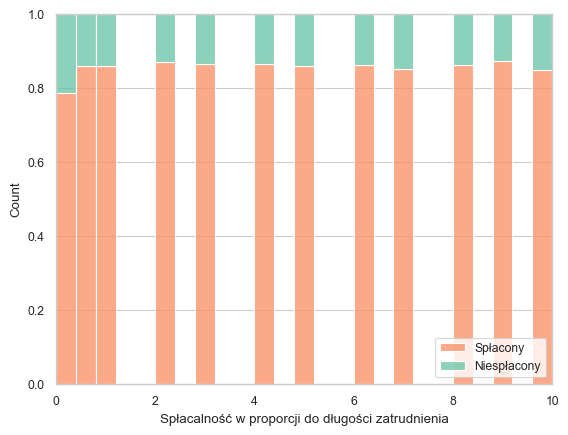

In [56]:
sns.histplot(data=Final, x='emp_length', hue='loan_status', multiple='fill', palette='Set2')
plt.xlabel('Spłacalność w proporcji do długości zatrudnienia')
plt.legend(loc=4, labels=['Spłacony','Niespłacony'])

    Z powyższego wykresu słupkowego możemy wyraźnie odczytać, że największy problem ze spłacalnością zobowiązań mają osoby zatrudnione poniżej roku. W pozostałych grupach dane są bardzo zbliżone.

VI. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

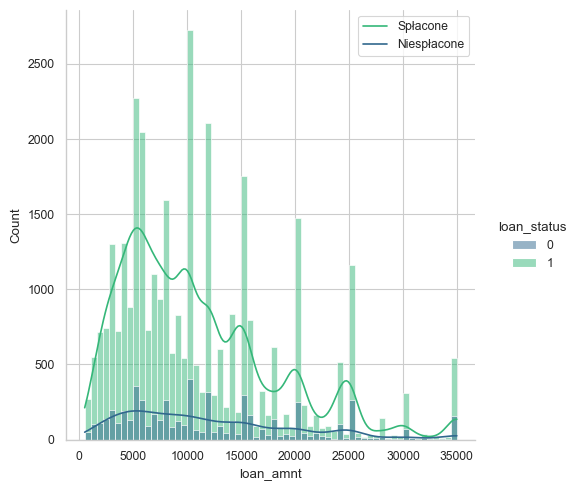

In [57]:
sns.displot(Final,
            x = 'loan_amnt',
            kde = True,
            hue = 'loan_status',
            palette = 'viridis')
plt.legend(labels=['Spłacone','Niespłacone'])

    Znowu możemy zaobserwować, że najwięcej pożyczek jest zaciąganych w kwotach do 10 - 12 tysięcy. Jednak w tej grupie także odsetek zobowiązań niespłaconych jet znacznie niższy. Im wyższe zobowiązanie tym bardziej zbliżają się do siebie krzywe odpowiadające za spłacone i niespłaconie kredyty.

# FEATURE ENGINEERING

 # Komentarz

    Sporo elementów z tej części zadania zrealizowałam przy okazji porządkowania danych w części pierszej:
        - imputacje
        - wyłuszczenie danych z kolumny string - kolumna 'is_consolidation'
        - zgrupowanie kolumn - wyciągnięcie średniej do kolumny 'fico'
        
        
    W tej części zamierzam się skupić na:
        - sprawdzeniu relacji pomiędzy kolumnami
        - One-hot encodingu
        - wyczyszczeniu outliersów - najlepiej zrobić to po wizualizacji danych

        

Sprawdzenie relacji pomiędzy kolumnami

In [58]:
# Utworzenie kolumny pokazującej ile (domyślnie %) pochniała pożyczka z przychodu miesięcznie 'debt'(dług):
Final['debt']=round(((Final['installment']*12)*100)/(Final['annual_inc']),2)
Final

id  loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  term  \
0      1077501     5000.0       5000.0           4975.0     24000.0    36   
1      1077430     2500.0       2500.0           2500.0     30000.0    60   
2      1077175     2400.0       2400.0           2400.0     12252.0    36   
3      1076863    10000.0      10000.0          10000.0     49200.0    36   
4      1075358     3000.0       3000.0           3000.0     80000.0    60   
...        ...        ...          ...              ...         ...   ...   
39781    92187     2500.0       2500.0           1075.0    110000.0    36   
39782    90665     8500.0       8500.0            875.0     18000.0    36   
39783    90395     5000.0       5000.0           1325.0    100000.0    36   
39784    90376     5000.0       5000.0            650.0    200000.0    36   
39785    87023     7500.0       7500.0            800.0     22000.0    36   

       installment  int_rate  loan_age  inq_last_6mths  ...  fico_status  \
0           162.87     10.65        26             1.0  ...            3   
1            59.83     15.27        12             5.0  ...            4   
2            84.33     15.96        10             2.0  ...            3   
3           339.31     13.49        15             1.0  ...            3   
4            67.79     12.69        15             0.0  ...            3   
...            ...       ...       ...             ...  ...          ...   
39781        78.42      8.07        21             0.0  ...            4   
39782       275.38     10.28        25             1.0  ...            3   
39783       156.84      8.07        13             0.0  ...            4   
39784       155.38      7.43        23             0.0  ...            5   
39785       255.43     13.75         8             0.0  ...            2   

       revol_bal  total_acc  open_acc  is_consolidation  emp_length  \
0        13648.0        9.0       3.0                 0        10.0   
1         1687.0        4.0       3.0                 0         0.5   
2         2956.0       10.0       2.0                 0        10.0   
3         5598.0       37.0      10.0                 0        10.0   
4        27783.0       38.0      15.0                 0         1.0   
...          ...        ...       ...               ...         ...   
39781     7274.0       40.0      13.0                 0         4.0   
39782     8847.0        9.0       6.0                 0         3.0   
39783     9698.0       20.0      11.0                 1         0.5   
39784    85607.0       26.0      17.0                 0         0.5   
39785     4175.0        8.0       7.0                 1         0.5   

       home_ownership  pub_rec  loan_status   debt  
0                   1      0.0            1   8.14  
1                   1      0.0            0   2.39  
2                   1      0.0            1   8.26  
3                   1      0.0            1   8.28  
4                   1      0.0            1   1.02  
...               ...      ...          ...    ...  
39781               2      0.0            1   0.86  
39782               1      0.0            1  18.36  
39783               2      0.0            1   1.88  
39784               2      0.0            1   0.93  
39785               3      0.0            1  13.93  

[39786 rows x 24 columns]

In [59]:
# Utworzenie kolumny z różnicą pomiędzy kredytem wnioskowanym, a otrzymanym 'diff_loan':
Final['diff_loan']=Final['funded_amnt']-Final['loan_amnt']
Final

id  loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  term  \
0      1077501     5000.0       5000.0           4975.0     24000.0    36   
1      1077430     2500.0       2500.0           2500.0     30000.0    60   
2      1077175     2400.0       2400.0           2400.0     12252.0    36   
3      1076863    10000.0      10000.0          10000.0     49200.0    36   
4      1075358     3000.0       3000.0           3000.0     80000.0    60   
...        ...        ...          ...              ...         ...   ...   
39781    92187     2500.0       2500.0           1075.0    110000.0    36   
39782    90665     8500.0       8500.0            875.0     18000.0    36   
39783    90395     5000.0       5000.0           1325.0    100000.0    36   
39784    90376     5000.0       5000.0            650.0    200000.0    36   
39785    87023     7500.0       7500.0            800.0     22000.0    36   

       installment  int_rate  loan_age  inq_last_6mths  ...  revol_bal  \
0           162.87     10.65        26             1.0  ...    13648.0   
1            59.83     15.27        12             5.0  ...     1687.0   
2            84.33     15.96        10             2.0  ...     2956.0   
3           339.31     13.49        15             1.0  ...     5598.0   
4            67.79     12.69        15             0.0  ...    27783.0   
...            ...       ...       ...             ...  ...        ...   
39781        78.42      8.07        21             0.0  ...     7274.0   
39782       275.38     10.28        25             1.0  ...     8847.0   
39783       156.84      8.07        13             0.0  ...     9698.0   
39784       155.38      7.43        23             0.0  ...    85607.0   
39785       255.43     13.75         8             0.0  ...     4175.0   

       total_acc  open_acc  is_consolidation  emp_length  home_ownership  \
0            9.0       3.0                 0        10.0               1   
1            4.0       3.0                 0         0.5               1   
2           10.0       2.0                 0        10.0               1   
3           37.0      10.0                 0        10.0               1   
4           38.0      15.0                 0         1.0               1   
...          ...       ...               ...         ...             ...   
39781       40.0      13.0                 0         4.0               2   
39782        9.0       6.0                 0         3.0               1   
39783       20.0      11.0                 1         0.5               2   
39784       26.0      17.0                 0         0.5               2   
39785        8.0       7.0                 1         0.5               3   

       pub_rec  loan_status   debt  diff_loan  
0          0.0            1   8.14        0.0  
1          0.0            0   2.39        0.0  
2          0.0            1   8.26        0.0  
3          0.0            1   8.28        0.0  
4          0.0            1   1.02        0.0  
...        ...          ...    ...        ...  
39781      0.0            1   0.86        0.0  
39782      0.0            1  18.36        0.0  
39783      0.0            1   1.88        0.0  
39784      0.0            1   0.93        0.0  
39785      0.0            1  13.93        0.0  

[39786 rows x 25 columns]

In [60]:
# Utworzenie kolumny sprawdzającej korelacje pomiędzy niezweryfikowanym przychodem, a niespłaconym kredytem 'vs_ls':
def vs_ls(row):
    if row['verification_status'] == 0 and row['loan_amnt'] == 0:
        return 1
    else: 
        return 0

Final['vs_ls']=Final.apply(lambda row: vs_ls(row), axis=1)
Final

id  loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  term  \
0      1077501     5000.0       5000.0           4975.0     24000.0    36   
1      1077430     2500.0       2500.0           2500.0     30000.0    60   
2      1077175     2400.0       2400.0           2400.0     12252.0    36   
3      1076863    10000.0      10000.0          10000.0     49200.0    36   
4      1075358     3000.0       3000.0           3000.0     80000.0    60   
...        ...        ...          ...              ...         ...   ...   
39781    92187     2500.0       2500.0           1075.0    110000.0    36   
39782    90665     8500.0       8500.0            875.0     18000.0    36   
39783    90395     5000.0       5000.0           1325.0    100000.0    36   
39784    90376     5000.0       5000.0            650.0    200000.0    36   
39785    87023     7500.0       7500.0            800.0     22000.0    36   

       installment  int_rate  loan_age  inq_last_6mths  ...  total_acc  \
0           162.87     10.65        26             1.0  ...        9.0   
1            59.83     15.27        12             5.0  ...        4.0   
2            84.33     15.96        10             2.0  ...       10.0   
3           339.31     13.49        15             1.0  ...       37.0   
4            67.79     12.69        15             0.0  ...       38.0   
...            ...       ...       ...             ...  ...        ...   
39781        78.42      8.07        21             0.0  ...       40.0   
39782       275.38     10.28        25             1.0  ...        9.0   
39783       156.84      8.07        13             0.0  ...       20.0   
39784       155.38      7.43        23             0.0  ...       26.0   
39785       255.43     13.75         8             0.0  ...        8.0   

       open_acc  is_consolidation  emp_length  home_ownership  pub_rec  \
0           3.0                 0        10.0               1      0.0   
1           3.0                 0         0.5               1      0.0   
2           2.0                 0        10.0               1      0.0   
3          10.0                 0        10.0               1      0.0   
4          15.0                 0         1.0               1      0.0   
...         ...               ...         ...             ...      ...   
39781      13.0                 0         4.0               2      0.0   
39782       6.0                 0         3.0               1      0.0   
39783      11.0                 1         0.5               2      0.0   
39784      17.0                 0         0.5               2      0.0   
39785       7.0                 1         0.5               3      0.0   

       loan_status   debt  diff_loan  vs_ls  
0                1   8.14        0.0      0  
1                0   2.39        0.0      0  
2                1   8.26        0.0      0  
3                1   8.28        0.0      0  
4                1   1.02        0.0      0  
...            ...    ...        ...    ...  
39781            1   0.86        0.0      0  
39782            1  18.36        0.0      0  
39783            1   1.88        0.0      0  
39784            1   0.93        0.0      0  
39785            1  13.93        0.0      0  

[39786 rows x 26 columns]

In [61]:
Final.vs_ls.value_counts()

0    39786
Name: vs_ls, dtype: int64

Kolumna posiada tylko wartości zerowe - czyli nie ma klinetów, którzy nie spłacili kredytu wśród tych z nie zweryfikowanym dochodem. Kolumna nic nie wniesie do analizy, więc można ją usunąć

In [62]:
Final=Final.drop('vs_ls', axis=1)

In [63]:
# Utworzenie kolumny pokazującej na pokrycie ilu miesięcznych rat wystarczyłoy całkowite odnawialne saldo kredytu 'hm_installment':
Final['hm_installment']=round(Final['revol_bal']/Final['installment'],0)
Final

id  loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  term  \
0      1077501     5000.0       5000.0           4975.0     24000.0    36   
1      1077430     2500.0       2500.0           2500.0     30000.0    60   
2      1077175     2400.0       2400.0           2400.0     12252.0    36   
3      1076863    10000.0      10000.0          10000.0     49200.0    36   
4      1075358     3000.0       3000.0           3000.0     80000.0    60   
...        ...        ...          ...              ...         ...   ...   
39781    92187     2500.0       2500.0           1075.0    110000.0    36   
39782    90665     8500.0       8500.0            875.0     18000.0    36   
39783    90395     5000.0       5000.0           1325.0    100000.0    36   
39784    90376     5000.0       5000.0            650.0    200000.0    36   
39785    87023     7500.0       7500.0            800.0     22000.0    36   

       installment  int_rate  loan_age  inq_last_6mths  ...  total_acc  \
0           162.87     10.65        26             1.0  ...        9.0   
1            59.83     15.27        12             5.0  ...        4.0   
2            84.33     15.96        10             2.0  ...       10.0   
3           339.31     13.49        15             1.0  ...       37.0   
4            67.79     12.69        15             0.0  ...       38.0   
...            ...       ...       ...             ...  ...        ...   
39781        78.42      8.07        21             0.0  ...       40.0   
39782       275.38     10.28        25             1.0  ...        9.0   
39783       156.84      8.07        13             0.0  ...       20.0   
39784       155.38      7.43        23             0.0  ...       26.0   
39785       255.43     13.75         8             0.0  ...        8.0   

       open_acc  is_consolidation  emp_length  home_ownership  pub_rec  \
0           3.0                 0        10.0               1      0.0   
1           3.0                 0         0.5               1      0.0   
2           2.0                 0        10.0               1      0.0   
3          10.0                 0        10.0               1      0.0   
4          15.0                 0         1.0               1      0.0   
...         ...               ...         ...             ...      ...   
39781      13.0                 0         4.0               2      0.0   
39782       6.0                 0         3.0               1      0.0   
39783      11.0                 1         0.5               2      0.0   
39784      17.0                 0         0.5               2      0.0   
39785       7.0                 1         0.5               3      0.0   

       loan_status   debt  diff_loan  hm_installment  
0                1   8.14        0.0            84.0  
1                0   2.39        0.0            28.0  
2                1   8.26        0.0            35.0  
3                1   8.28        0.0            16.0  
4                1   1.02        0.0           410.0  
...            ...    ...        ...             ...  
39781            1   0.86        0.0            93.0  
39782            1  18.36        0.0            32.0  
39783            1   1.88        0.0            62.0  
39784            1   0.93        0.0           551.0  
39785            1  13.93        0.0            16.0  

[39786 rows x 26 columns]

One-hot encoding

In [64]:
# Najpierw na podstawie wartości liczbowych w kolumnie fico utworzę kolumnę 'rating' z nazwami przedziałów ratingu:
def rating(row):
    if row['fico'] <= 580:
        return 'fico_poor'
    elif row['fico']>=580 and row['fico']<=669:
        return 'fico_fair'
    elif row['fico']>=670 and row['fico']<=739:
        return 'fico_good'
    elif row['fico']>=740 and row['fico']<=799:
        return 'fico_very_good'
    return 'fico_exceptional'

Final['rating']=Final.apply(lambda row: rating(row), axis=1)

In [65]:
#Utworzenie nowych kolumn na podstawie fico i usunięcie kolumny pomocniczej 'rating':
encoded_columns = pd.get_dummies(Final['rating'])
Final = Final.join(encoded_columns).drop('rating', axis=1)
Final

id  loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  term  \
0      1077501     5000.0       5000.0           4975.0     24000.0    36   
1      1077430     2500.0       2500.0           2500.0     30000.0    60   
2      1077175     2400.0       2400.0           2400.0     12252.0    36   
3      1076863    10000.0      10000.0          10000.0     49200.0    36   
4      1075358     3000.0       3000.0           3000.0     80000.0    60   
...        ...        ...          ...              ...         ...   ...   
39781    92187     2500.0       2500.0           1075.0    110000.0    36   
39782    90665     8500.0       8500.0            875.0     18000.0    36   
39783    90395     5000.0       5000.0           1325.0    100000.0    36   
39784    90376     5000.0       5000.0            650.0    200000.0    36   
39785    87023     7500.0       7500.0            800.0     22000.0    36   

       installment  int_rate  loan_age  inq_last_6mths  ...  home_ownership  \
0           162.87     10.65        26             1.0  ...               1   
1            59.83     15.27        12             5.0  ...               1   
2            84.33     15.96        10             2.0  ...               1   
3           339.31     13.49        15             1.0  ...               1   
4            67.79     12.69        15             0.0  ...               1   
...            ...       ...       ...             ...  ...             ...   
39781        78.42      8.07        21             0.0  ...               2   
39782       275.38     10.28        25             1.0  ...               1   
39783       156.84      8.07        13             0.0  ...               2   
39784       155.38      7.43        23             0.0  ...               2   
39785       255.43     13.75         8             0.0  ...               3   

       pub_rec  loan_status   debt  diff_loan  hm_installment  \
0          0.0            1   8.14        0.0            84.0   
1          0.0            0   2.39        0.0            28.0   
2          0.0            1   8.26        0.0            35.0   
3          0.0            1   8.28        0.0            16.0   
4          0.0            1   1.02        0.0           410.0   
...        ...          ...    ...        ...             ...   
39781      0.0            1   0.86        0.0            93.0   
39782      0.0            1  18.36        0.0            32.0   
39783      0.0            1   1.88        0.0            62.0   
39784      0.0            1   0.93        0.0           551.0   
39785      0.0            1  13.93        0.0            16.0   

       fico_exceptional  fico_fair  fico_good  fico_very_good  
0                     0          0          1               0  
1                     0          0          0               1  
2                     0          0          1               0  
3                     0          0          1               0  
4                     0          0          1               0  
...                 ...        ...        ...             ...  
39781                 0          0          0               1  
39782                 0          0          1               0  
39783                 0          0          0               1  
39784                 1          0          0               0  
39785                 0          1          0               0  

[39786 rows x 30 columns]

Outliers

In [66]:
Final.shape

(39786, 30)

In [67]:
Final.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc',
       'term', 'installment', 'int_rate', 'loan_age', 'inq_last_6mths',
       'verification_status', 'dti', 'grade', 'fico', 'fico_status',
       'revol_bal', 'total_acc', 'open_acc', 'is_consolidation', 'emp_length',
       'home_ownership', 'pub_rec', 'loan_status', 'debt', 'diff_loan',
       'hm_installment', 'fico_exceptional', 'fico_fair', 'fico_good',
       'fico_very_good'],
      dtype='object')

In [68]:
# Na podstawie analizy boxplot z części 2 wyodrębnione kolumny do usunięcia outliersów to:
# loan_amnt, funded_amnt, funded_amnt_inv, annual_inc, installment, int_rate, revol_bal, total_acc, openacc

In [69]:
# Wykonanie standaryzacji danych na kolumnach wyznaczonych do usunięcia outliersów:

z = np.abs(stats.zscore(Final[['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc',
       'term', 'installment', 'int_rate', 'inq_last_6mths',
       'verification_status', 'dti', 'grade', 'fico', 'fico_status',
       'revol_bal', 'total_acc', 'open_acc', 'is_consolidation', 'emp_length',
       'home_ownership', 'pub_rec', 'loan_status', 'debt', 'diff_loan',
       'hm_installment', 'fico_exceptional', 'fico_fair', 'fico_good',
       'fico_very_good']]))

print(z)

# Punkty odstające:
print(np.where(z > 3))

             id  loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  \
0      1.870693   0.834805     0.828292         0.761556    0.705423   
1      1.870356   1.169726     1.175805         1.108409    0.611323   
2      1.869146   1.183123     1.189705         1.122424    0.889671   
3      1.867665   0.164963     0.133267         0.057337    0.310202   
4      1.860521   1.102742     1.106302         1.038338    0.172845   
...         ...        ...          ...              ...         ...   
39781  2.806260   1.169726     1.175805         1.308113    0.643346   
39782  2.813484   0.365916     0.341775         1.336142    0.799523   
39783  2.814766   0.834805     0.828292         1.273077    0.486513   
39784  2.814856   0.834805     0.828292         1.367674    2.054849   
39785  2.830771   0.499884     0.480780         1.346652    0.736790   

           term  installment  int_rate  inq_last_6mths  verification_status  \
0      0.606139     0.774762  0.369659        0.122377  

In [70]:
# Sprawdzenie tabeli przed usunięciem outliersów:
Final.shape

(39786, 30)

In [71]:
# Usunięcie outliersów:
Final_outliers_removed = Final[(z<3).all(axis=1)]

In [72]:
# Sprawdzenie tabeli pp usunięciu outliersów:
Final_outliers_removed.shape

(30238, 30)

In [73]:
final_to_ml=Final_outliers_removed

In [74]:
final_to_ml=final_to_ml.drop('id',axis =1)  

# MODELOWANIE

In [75]:
ftm=final_to_ml

In [76]:
ftm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30238 entries, 0 to 39783
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            30238 non-null  float64
 1   funded_amnt          30238 non-null  float64
 2   funded_amnt_inv      30238 non-null  float64
 3   annual_inc           30238 non-null  float64
 4   term                 30238 non-null  int64  
 5   installment          30238 non-null  float64
 6   int_rate             30238 non-null  float64
 7   loan_age             30238 non-null  int64  
 8   inq_last_6mths       30238 non-null  float64
 9   verification_status  30238 non-null  int64  
 10  dti                  30238 non-null  float64
 11  grade                30238 non-null  int64  
 12  fico                 30238 non-null  float64
 13  fico_status          30238 non-null  int64  
 14  revol_bal            30238 non-null  float64
 15  total_acc            30238 non-null 

In [77]:
ftm.describe()

loan_amnt   funded_amnt  funded_amnt_inv     annual_inc  \
count  30238.000000  30238.000000     30238.000000   30238.000000   
mean   10501.677525  10447.396488      9955.600965   63426.791797   
std     6421.766810   6408.677590      6357.403895   34067.623067   
min      500.000000    500.000000         0.000000    4080.000000   
25%     5500.000000   5400.000000      5000.000000   40000.000000   
50%     9600.000000   9250.000000      8625.000000   56000.000000   
75%    14500.000000  14400.000000     13875.000000   78500.000000   
max    32500.000000  32500.000000     31800.000000  260000.000000   

               term   installment      int_rate      loan_age  inq_last_6mths  \
count  30238.000000  30238.000000  30238.000000  30238.000000    30238.000000   
mean      41.948012    309.687719     11.437163     13.996693        0.811198   
std       10.362287    186.457241      3.407198      6.671484        0.988259   
min       36.000000     15.690000      5.420000      3.000000        0.000000   
25%       36.000000    165.640000      8.590000      9.000000        0.000000   
50%       36.000000    272.980000     11.360000     13.000000        0.000000   
75%       36.000000    409.722500     13.610000     17.000000        1.000000   
max       60.000000    948.470000     22.350000     57.000000        4.000000   

       verification_status  ...  home_ownership  pub_rec   loan_status  \
count         30238.000000  ...    30238.000000  30238.0  30238.000000   
mean              0.855315  ...        1.570772      0.0      0.870527   
std               0.848711  ...        0.635774      0.0      0.335728   
min               0.000000  ...        0.000000      0.0      0.000000   
25%               0.000000  ...        1.000000      0.0      1.000000   
50%               1.000000  ...        1.000000      0.0      1.000000   
75%               2.000000  ...        2.000000      0.0      1.000000   
max               2.000000  ...        3.000000      0.0      1.000000   

               debt     diff_loan  hm_installment  fico_exceptional  \
count  30238.000000  30238.000000    30238.000000           30238.0   
mean       6.573470    -54.281037       43.379026               0.0   
std        3.735892    416.903246       45.446279               0.0   
min        0.200000  -4550.000000        0.000000               0.0   
25%        3.660000      0.000000       16.000000               0.0   
50%        5.880000      0.000000       31.000000               0.0   
75%        8.850000      0.000000       52.000000               0.0   
max       18.570000      0.000000      318.000000               0.0   

       fico_fair     fico_good  fico_very_good  
count    30238.0  30238.000000    30238.000000  
mean         0.0      0.715987        0.284013  
std          0.0      0.450951        0.450951  
min          0.0      0.000000        0.000000  
25%          0.0      0.000000        0.000000  
50%          0.0      1.000000        0.000000  
75%          0.0      1.000000        1.000000  
max          0.0      1.000000        1.000000  

[8 rows x 29 columns]

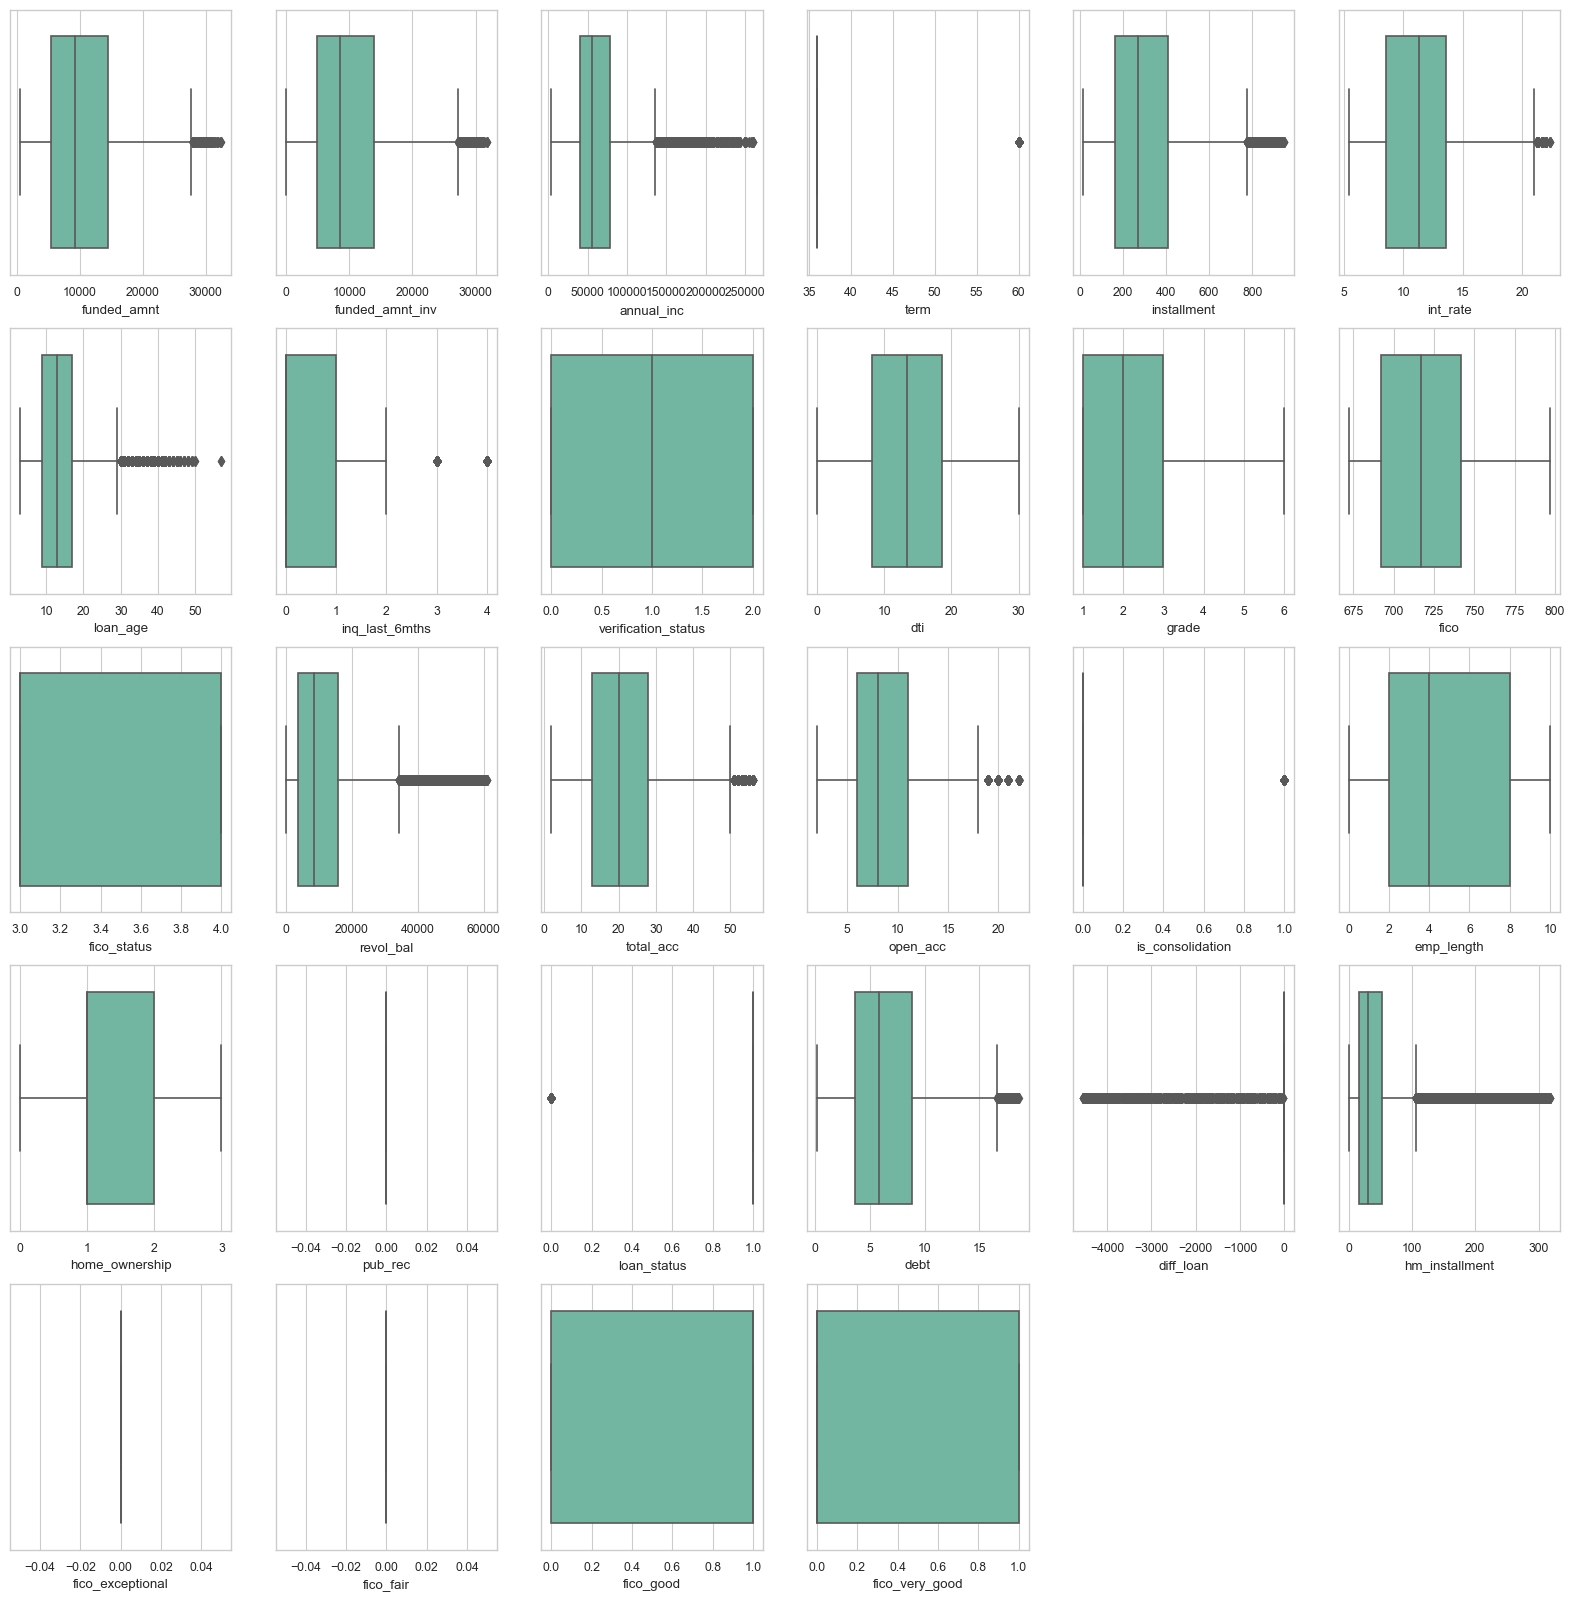

In [78]:
# pokazanie danych na wykresach
plt.figure(figsize=(20,20), dpi=100)

for i in range (1, len(ftm.columns)):
    plt.subplot(5,6,i)
    sns.boxplot(x=ftm.columns[i], data=ftm, palette='Set2')

Oddzielenie od danych kolumny 'loan_status' - jako tej docelowo analizowanej (nie możemy mieć informacji czy klient spłacił kredyt skoro dopiero chcemy to przewidzieć na podstawie danych)

In [79]:
# wykonanie standaryzacji przed zastosowaniem PCA

scaler = StandardScaler()
ftm_scaled = scaler.fit_transform(ftm)

In [80]:
ftm_scaled_df = pd.DataFrame(ftm_scaled,columns=ftm.columns)

In [81]:
ftm_scaled_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  annual_inc      term  installment  \
0  -0.856738    -0.850017        -0.783446   -1.157329 -0.574015    -0.787420   
1  -1.261617    -1.255724        -1.188492   -1.502178 -0.574015    -1.208649   
2  -0.078123    -0.069812         0.006984   -0.417611 -0.574015     0.158872   
3  -0.856738    -0.850017        -0.779514   -0.805082 -0.574015    -0.821798   
4  -0.545292    -0.537935        -0.464915   -0.482072  1.742114    -0.748751   

   int_rate  loan_age  inq_last_6mths  verification_status  ...  \
0 -0.231033  1.799226        0.191048             1.348757  ...   
1  1.327458 -0.599081        1.202946            -1.007798  ...   
2  0.602510  0.150390        0.191048             0.170480  ...   
3 -1.038162 -1.048763        2.214843             0.170480  ...   
4  1.327458 -1.198658        0.191048            -1.007798  ...   

   home_ownership  pub_rec  loan_status      debt  diff_loan  hm_installment  \
0       -0.897774      0.0     0.385654  0.419326   0.130203        0.893839   
1       -0.897774      0.0     0.385654  0.451447   0.130203       -0.184375   
2       -0.897774      0.0     0.385654  0.456801   0.130203       -0.602458   
3       -0.897774      0.0     0.385654 -0.362294   0.130203        0.167695   
4       -0.897774      0.0     0.385654 -0.597851   0.130203        1.333926   

   fico_exceptional  fico_fair  fico_good  fico_very_good  
0               0.0        0.0   0.629821       -0.629821  
1               0.0        0.0   0.629821       -0.629821  
2               0.0        0.0   0.629821       -0.629821  
3               0.0        0.0   0.629821       -0.629821  
4               0.0        0.0   0.629821       -0.629821  

[5 rows x 29 columns]

<AxesSubplot:>

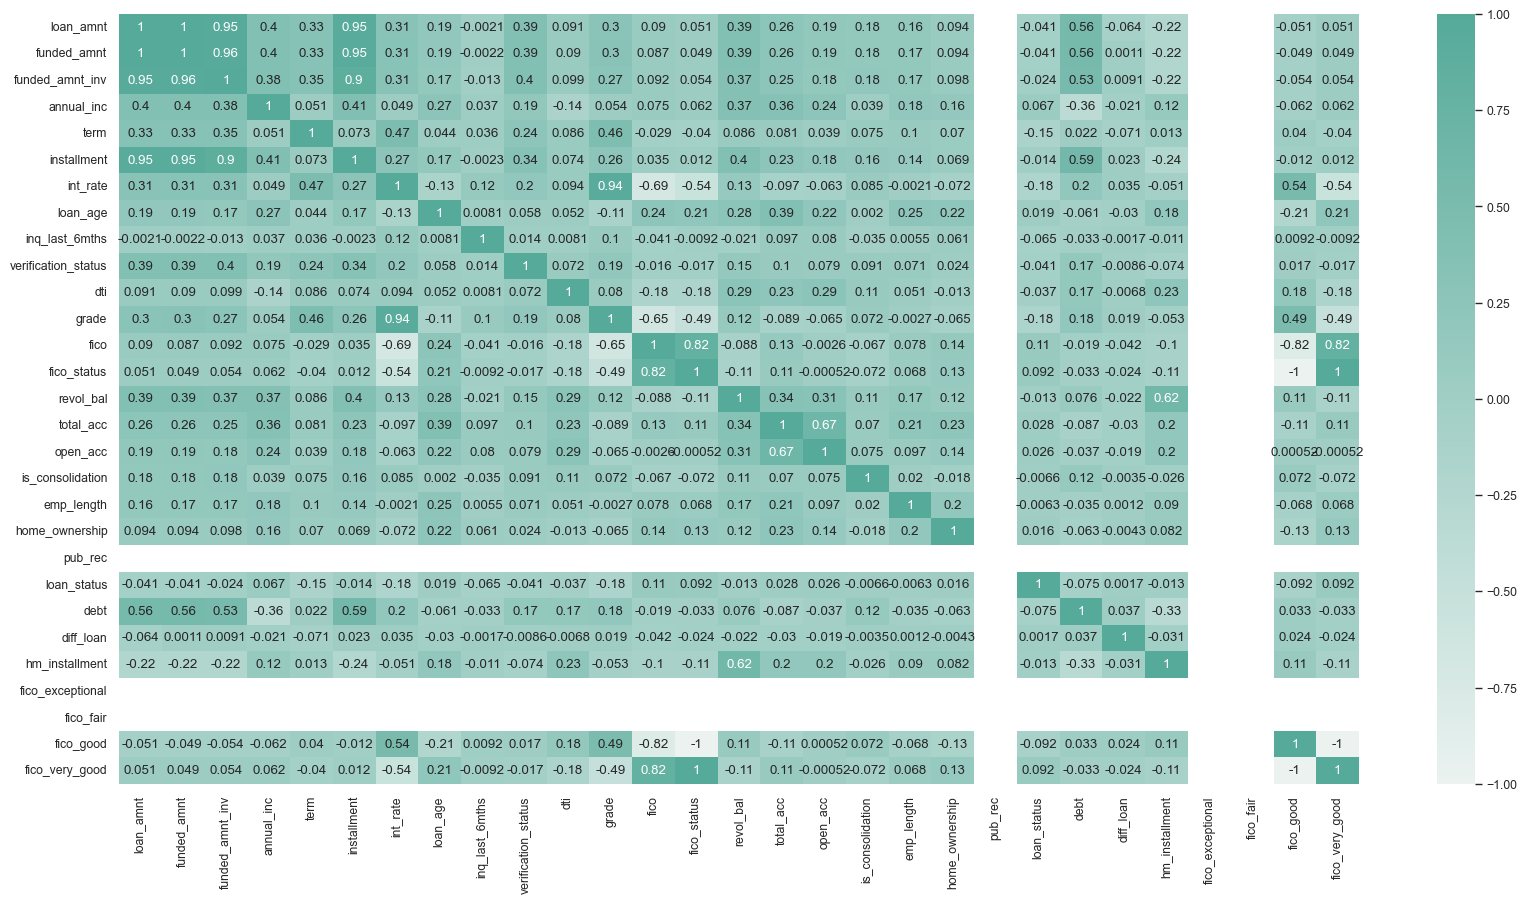

In [82]:
# przedstawienie korelacji wystandaryzowanych danych za pomocą heatmapy
plt.figure(figsize = (20,10))   
cmap=sns.color_palette("light:#5A9", as_cmap=True)
sns.heatmap(ftm_scaled_df.corr(),annot = True, cmap=cmap)

In [83]:
# heatmapa pokazuje, że po usunięcie outliersów i zastosowaniu standaryzacji dane w kolumnach 'pub_rec', 'fico_exceptional' i 'fico_fair' praktycznie nie wpływaja na inne dane, więc je usuwam

In [84]:
ftm=ftm.drop(['pub_rec', 'fico_exceptional', 'fico_fair'], axis=1)

In [85]:
# Ponowne wykonanie standaryzacji po usunięciu kolumn 'pub_rec', 'fico_exceptional' i 'fico_fair'

scaler = StandardScaler()
ftm_scaled = scaler.fit_transform(ftm)

In [86]:
ftm_scaled_df = pd.DataFrame(ftm_scaled,columns=ftm.columns)

In [87]:
ftm_scaled_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  annual_inc      term  installment  \
0  -0.856738    -0.850017        -0.783446   -1.157329 -0.574015    -0.787420   
1  -1.261617    -1.255724        -1.188492   -1.502178 -0.574015    -1.208649   
2  -0.078123    -0.069812         0.006984   -0.417611 -0.574015     0.158872   
3  -0.856738    -0.850017        -0.779514   -0.805082 -0.574015    -0.821798   
4  -0.545292    -0.537935        -0.464915   -0.482072  1.742114    -0.748751   

   int_rate  loan_age  inq_last_6mths  verification_status  ...  open_acc  \
0 -0.231033  1.799226        0.191048             1.348757  ... -1.486276   
1  1.327458 -0.599081        1.202946            -1.007798  ... -1.735623   
2  0.602510  0.150390        0.191048             0.170480  ...  0.259151   
3 -1.038162 -1.048763        2.214843             0.170480  ...  0.009805   
4  1.327458 -1.198658        0.191048            -1.007798  ... -0.488889   

   is_consolidation  emp_length  home_ownership  loan_status      debt  \
0         -0.533011    1.512221       -0.897774     0.385654  0.419326   
1         -0.533011    1.512221       -0.897774     0.385654  0.451447   
2         -0.533011    1.512221       -0.897774     0.385654  0.456801   
3         -0.533011   -0.501651       -0.897774     0.385654 -0.362294   
4         -0.533011    0.936829       -0.897774     0.385654 -0.597851   

   diff_loan  hm_installment  fico_good  fico_very_good  
0   0.130203        0.893839   0.629821       -0.629821  
1   0.130203       -0.184375   0.629821       -0.629821  
2   0.130203       -0.602458   0.629821       -0.629821  
3   0.130203        0.167695   0.629821       -0.629821  
4   0.130203        1.333926   0.629821       -0.629821  

[5 rows x 26 columns]

# PCA

In [88]:
pca = PCA(random_state=42)
pca.fit(ftm_scaled)

PCA(random_state=42)

In [89]:
pca.components_[0]

array([ 0.38284086,  0.38352013,  0.37298514,  0.1627209 ,  0.17520651,
        0.36507798,  0.25716813,  0.06856905,  0.01913518,  0.19181638,
        0.09738556,  0.24572874, -0.11629004, -0.12275108,  0.21143851,
        0.12595332,  0.11194247,  0.10053732,  0.08010131,  0.03544734,
       -0.04905164,  0.21374336, -0.00157795, -0.03468143,  0.12275108,
       -0.12275108])

In [90]:
# Wrzucenie PCA do tabeli, aby móc przedstawić na wykresie rozkład danych
colnames = list(ftm.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

PC1       PC2          Feature
0  0.382841  0.160887        loan_amnt
1  0.383520  0.159890      funded_amnt
2  0.372985  0.158328  funded_amnt_inv
3  0.162721  0.135109       annual_inc
4  0.175207 -0.021551             term

<function matplotlib.pyplot.show(close=None, block=None)>

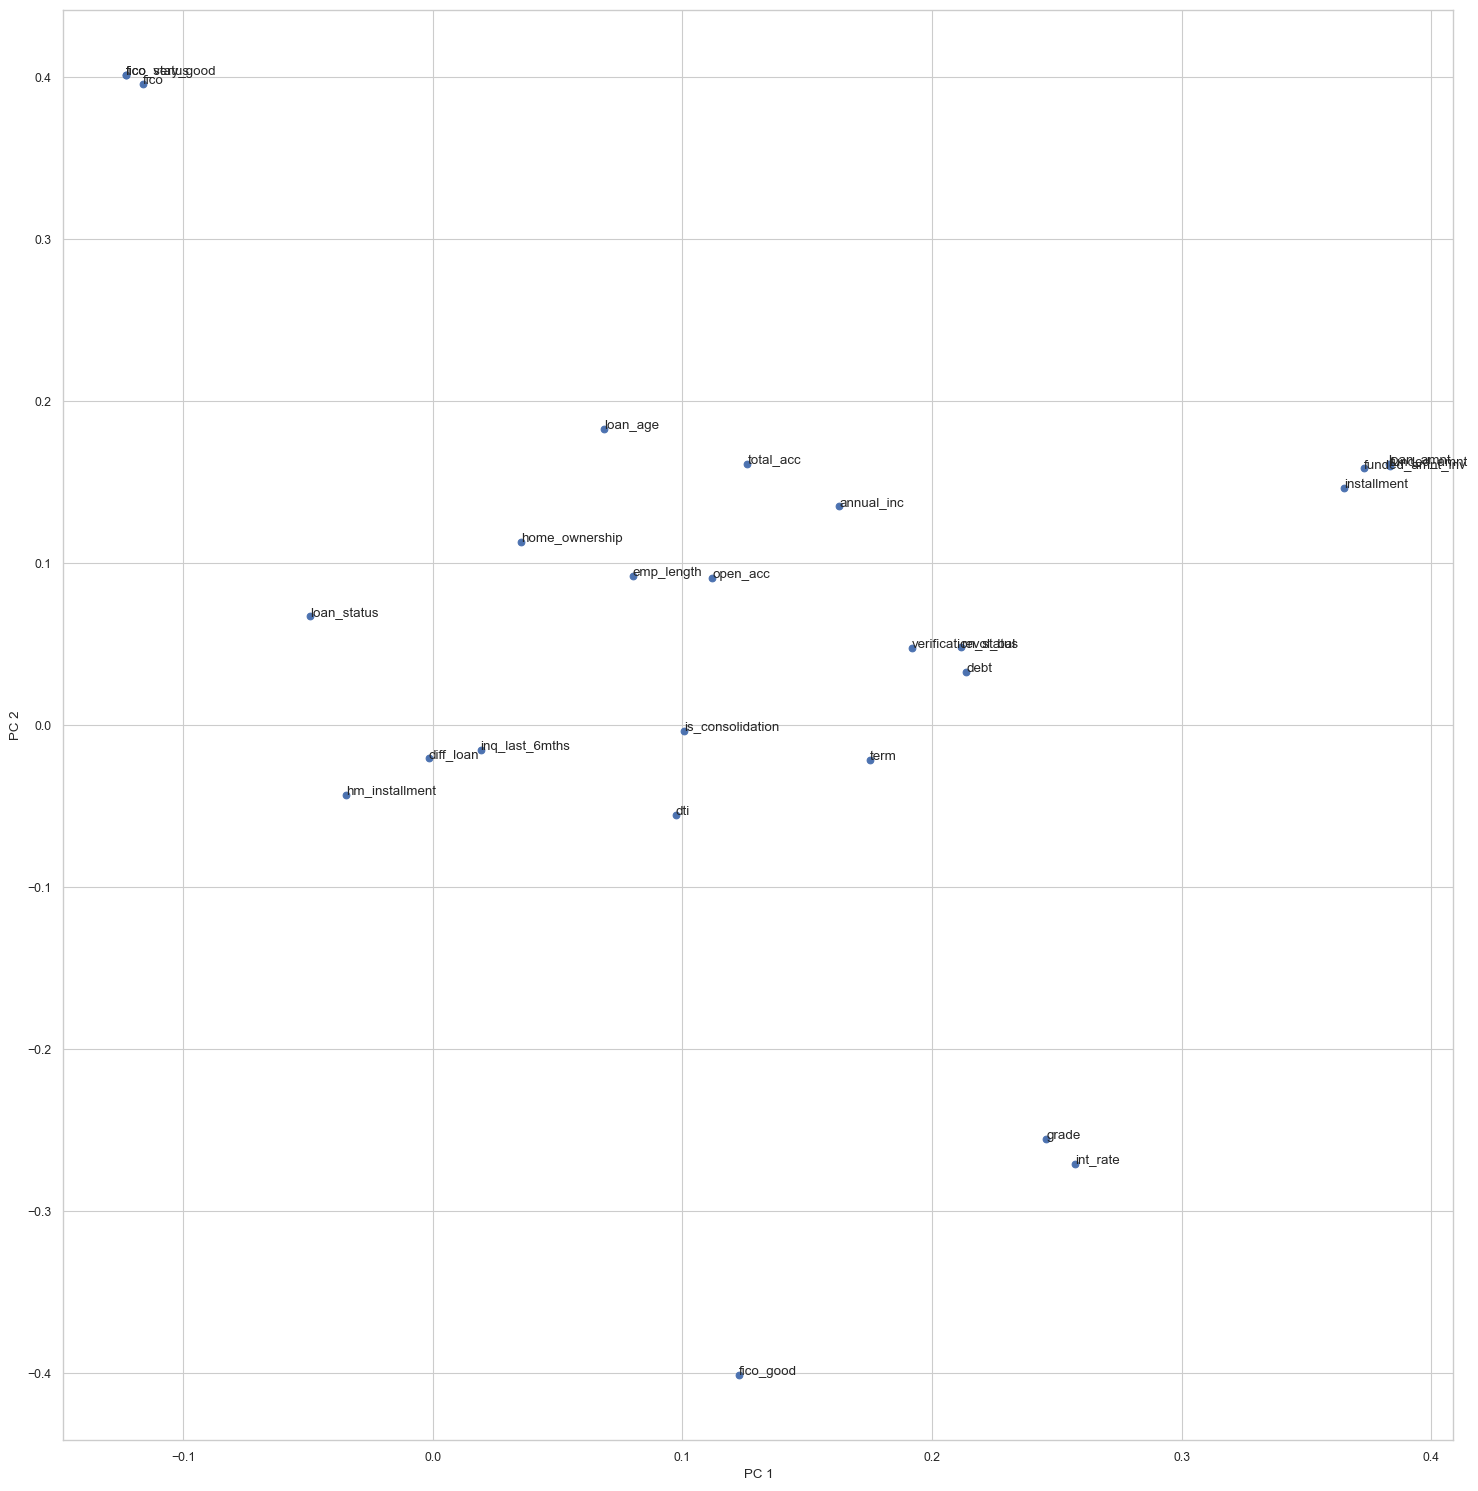

In [91]:
# Przedstawienie danych na wykresie PCA, żeby sprawdzić zależności i oszacować liczbę potencjalnych klastrów
fig = plt.figure(figsize = (15,15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show

#    KMeans

In [92]:
kmeans = KMeans(n_clusters=4, max_iter=1000)
kmeans.fit(ftm_scaled_df)

KMeans(max_iter=1000, n_clusters=4)

In [93]:
kmeans.labels_

array([0, 0, 0, ..., 2, 0, 2])

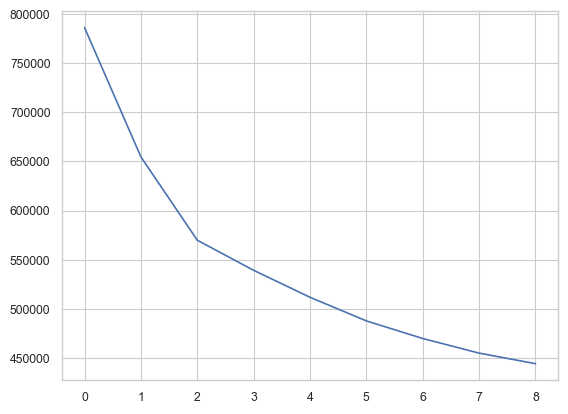

In [94]:
# Zastosowanie metody łokcia na większęj liczbie klastrów w celu sprawdzenia czy zadana w KMeans liczba klastrów jest dobra
ssd = [] 
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(ftm_scaled_df)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

# metoda łokcia pokazuje, że 2 klastry są graniczną wartością 

In [95]:
# weryfikacja liczby klastrów po analizie metody łokcia
kmeans = KMeans(n_clusters=2, max_iter=1000)
kmeans.fit(ftm_scaled_df)

KMeans(max_iter=1000, n_clusters=2)

In [96]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [97]:
# dodanie do tabeli ftm kolumny z oznaczeniem klastrów metoda KMeans w celu pokazania ich później na wykresie
ftm['K-Means'] = kmeans.labels_

#    Metoda Hierarchiczna pokazana na dendrogramie

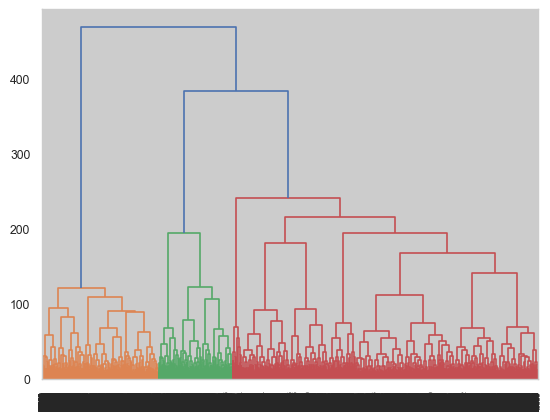

In [98]:
wa_mergings = linkage(ftm_scaled_df, method="ward", metric='euclidean')
dendrogram(wa_mergings)
plt.show()

In [99]:
# 3 klastry z ward linkage
wa_cluster_labels = cut_tree(wa_mergings, n_clusters=3).reshape(-1, )
wa_cluster_labels

array([0, 0, 0, ..., 2, 0, 2])

In [100]:
# dodanie do tabeli ftm kolumny z oznaczeniem klastrów metodą hierarchiczną w celu pokazania ich później na wykresie
ftm['Hierarchical'] = wa_cluster_labels

In [101]:
ftm.Hierarchical.value_counts()

0    18592
2     7157
1     4489
Name: Hierarchical, dtype: int64

#    DBScan

In [102]:
# określnie parametrów dla DBScan:
# MIN_SAMPLES=ilość kolumn *2 = 25*2 = 50
# EPS = poniżej wykorzystując funkcje najbliżsi sąsiedzi wyliczam odległości między punktami i w wykresu odczytuję, 
# że największa krzywizna jest przy parametrze 3 - to mój EPS

In [103]:
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(ftm_scaled_df) 
dist,indices=nbrs.kneighbors(ftm_scaled_df) 

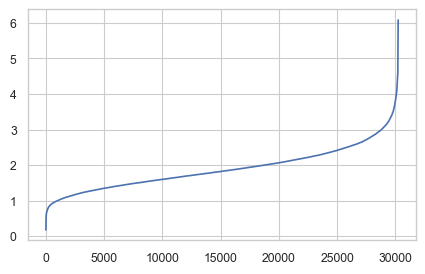

In [104]:
dist = np.sort(dist, axis = 0)
dist = dist[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(dist) 
plt.show()

In [105]:
clustering = DBSCAN(eps=3, min_samples=50, n_jobs=-1).fit(ftm_scaled_df)
clustering.labels_

array([0, 0, 0, ..., 2, 0, 2], dtype=int64)

In [106]:
# dodanie do tabeli ftm kolumny z oznaczeniem klastrów metodą DBScan w celu pokazania ich później na wykresie
ftm['DBScan'] = clustering.labels_

In [107]:
ftm.DBScan.value_counts()

 0    16448
 2     6308
-1     5951
 1     1531
Name: DBScan, dtype: int64

# Przedstawienie danych w odniesieniu do powyższych metod klastrowania na wykresach

In [108]:
ftm.head()

loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  term  installment  \
0     5000.0       5000.0           4975.0     24000.0    36       162.87   
2     2400.0       2400.0           2400.0     12252.0    36        84.33   
3    10000.0      10000.0          10000.0     49200.0    36       339.31   
5     5000.0       5000.0           5000.0     36000.0    36       156.46   
6     7000.0       7000.0           7000.0     47004.0    60       170.08   

   int_rate  loan_age  inq_last_6mths  verification_status  ...  \
0     10.65        26             1.0                    2  ...   
2     15.96        10             2.0                    0  ...   
3     13.49        15             1.0                    1  ...   
5      7.90         7             3.0                    1  ...   
6     15.96         6             1.0                    0  ...   

   home_ownership  loan_status  debt  diff_loan  hm_installment  fico_good  \
0               1            1  8.14        0.0            84.0          1   
2               1            1  8.26        0.0            35.0          1   
3               1            1  8.28        0.0            16.0          1   
5               1            1  5.22        0.0            51.0          1   
6               1            1  4.34        0.0           104.0          1   

   fico_very_good  K-Means  Hierarchical  DBScan  
0               0        0             0       0  
2               0        0             0       0  
3               0        0             0       0  
5               0        0             0       0  
6               0        0             0       0  

[5 rows x 29 columns]

    Pokazanie wybranych zmiennych w podziale na klastry w wybranych metodach klastrowania

In [109]:
def plot_boxplot(y):
    plt.figure(figsize=(20,20), dpi=200)
    claster=pd.DataFrame(ftm, columns=['','K-Means','Hierarchical','DBScan'])
    claster_columns=claster.columns
    for i in range (1,len(claster_columns)):
        plt.subplot(3,3,i)
        sns.boxplot(x=claster_columns[i], y=y, data=ftm, palette='Set2')

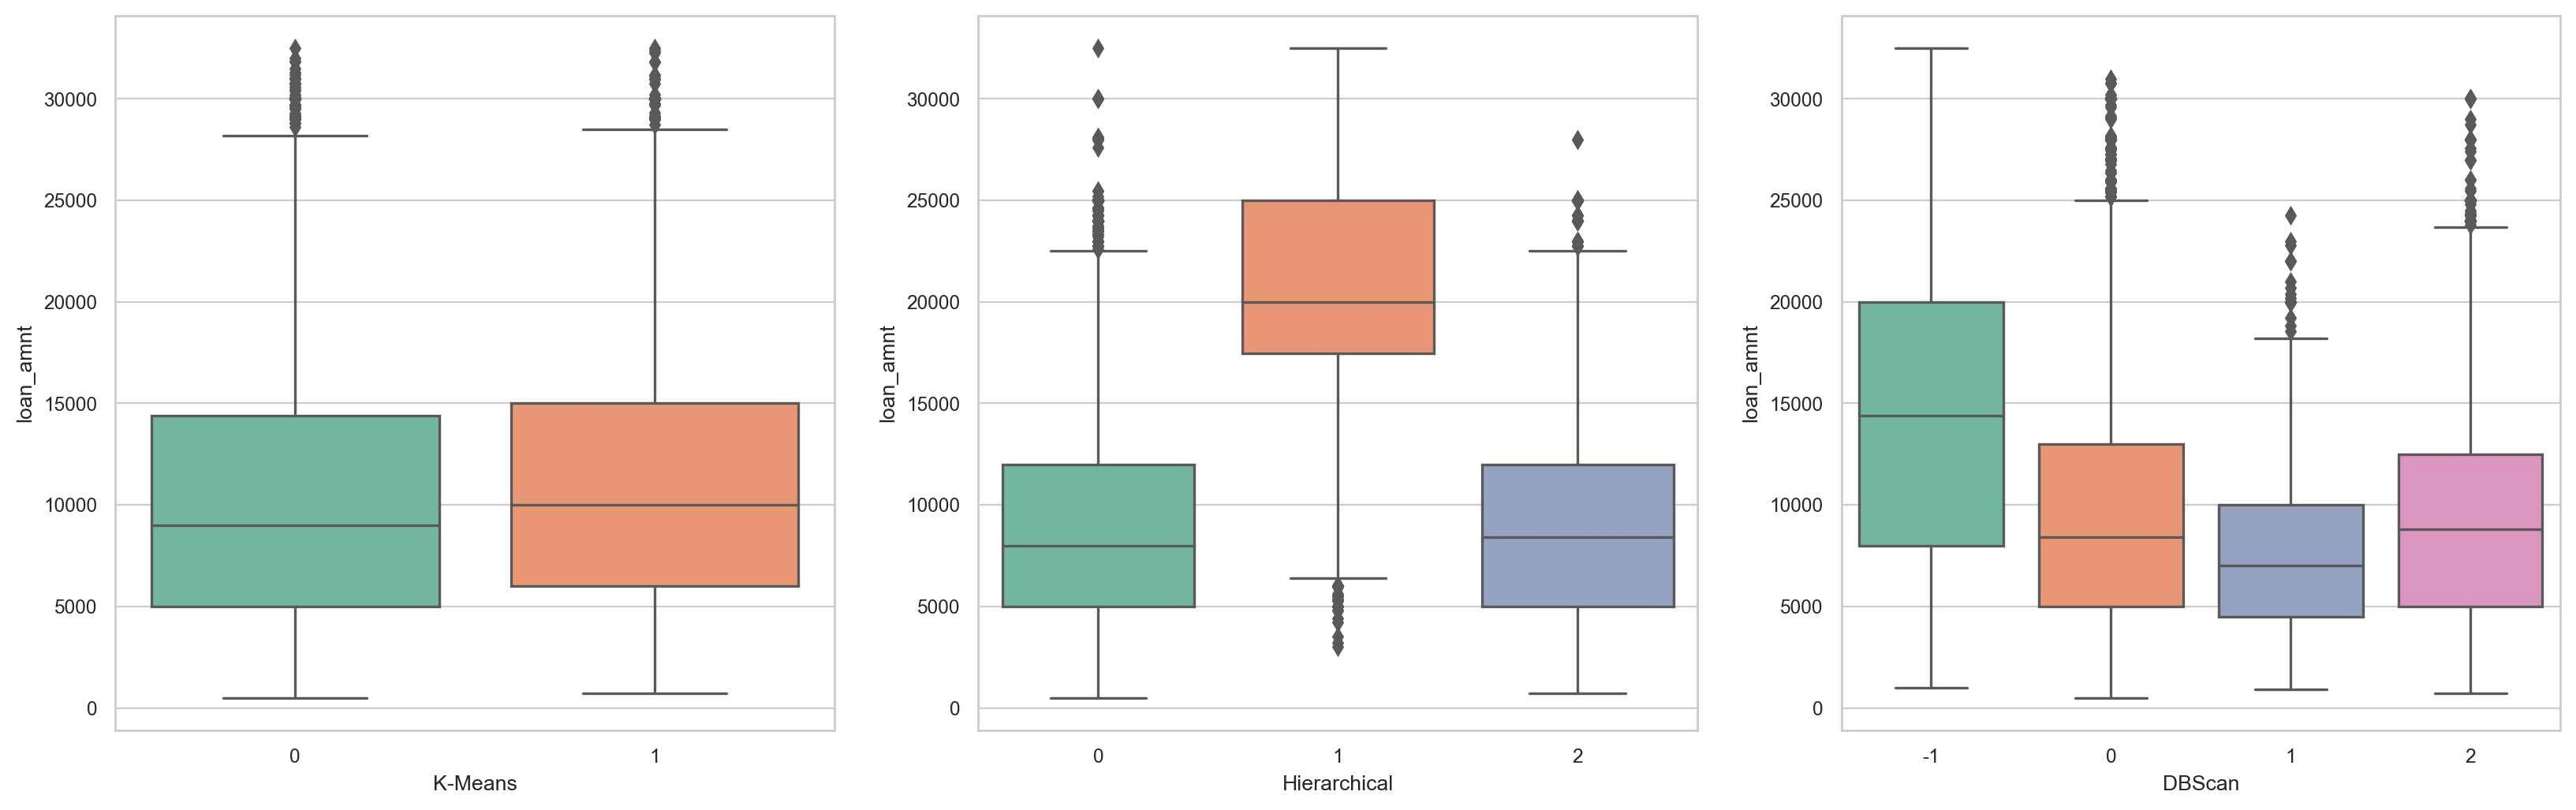

In [110]:
plot_boxplot(y='loan_amnt')

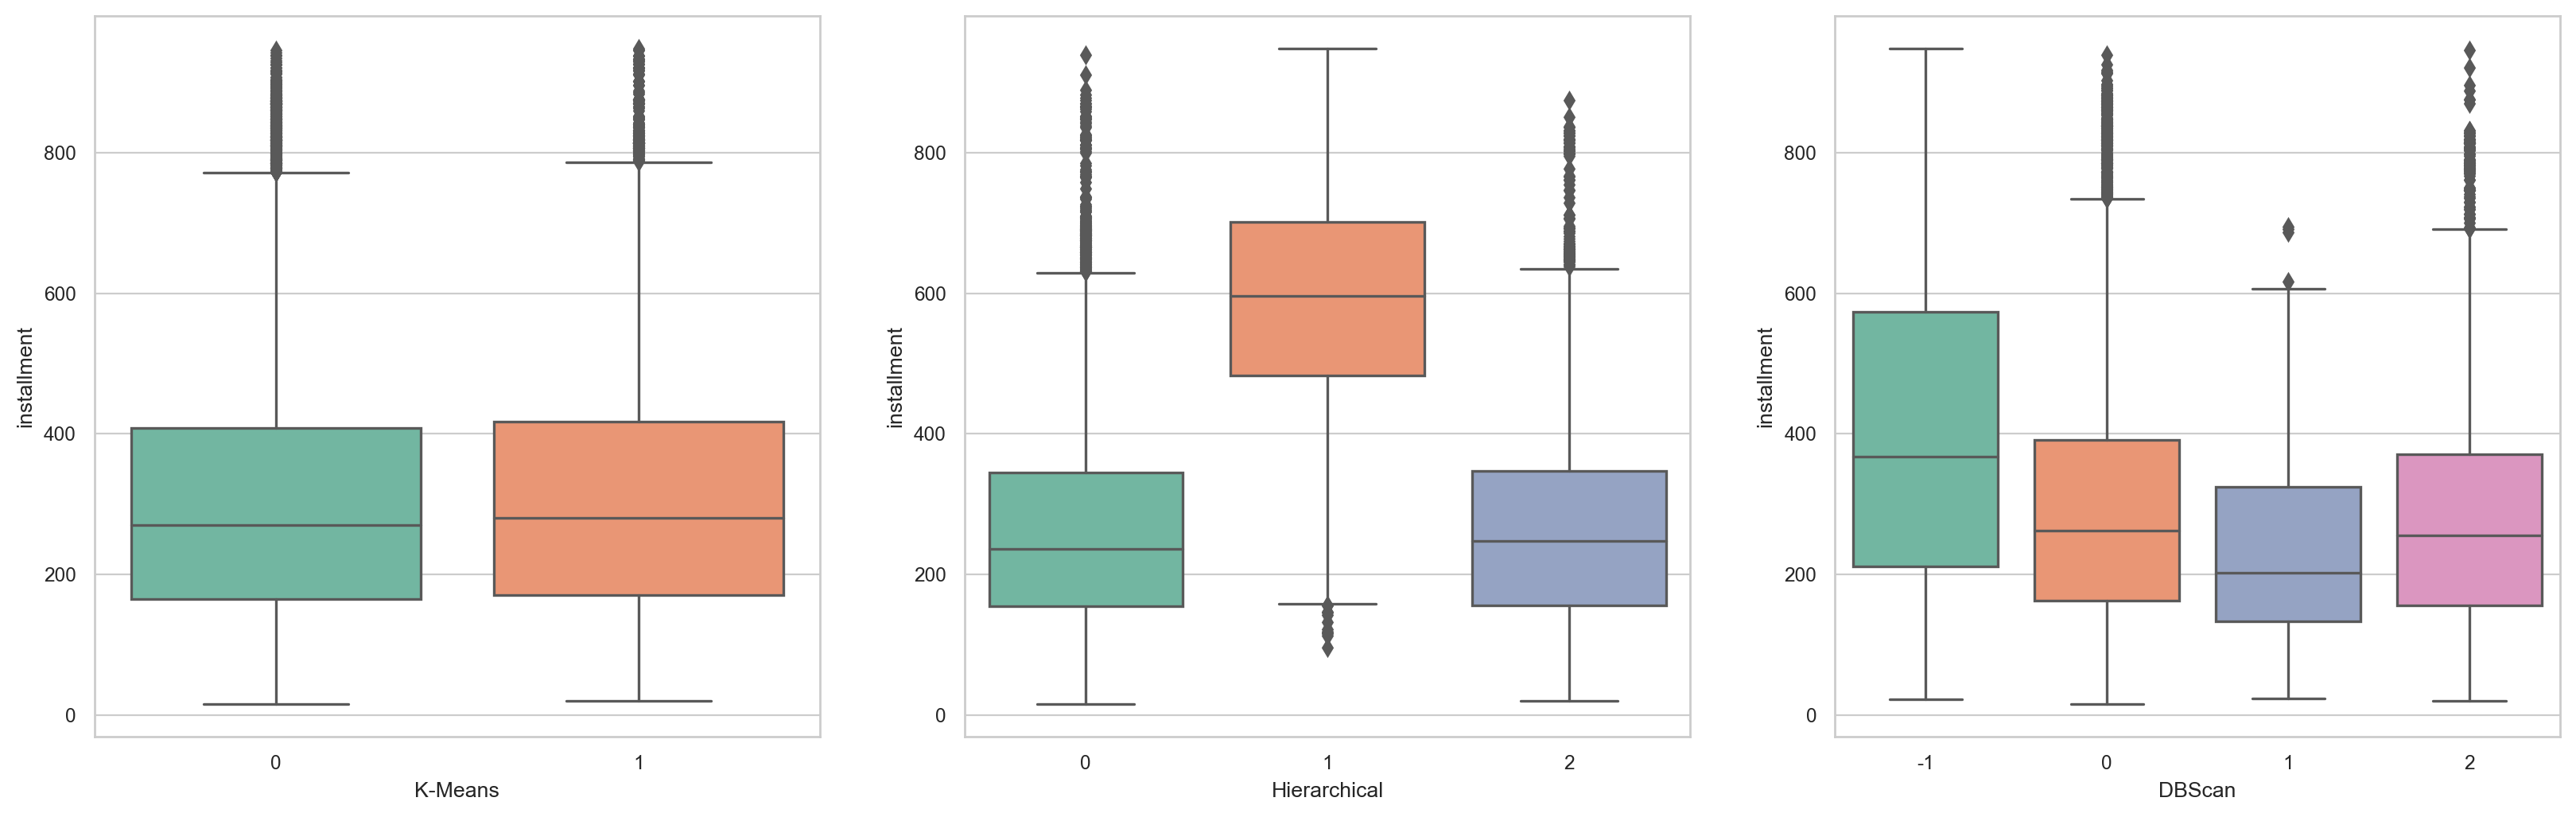

In [111]:
plot_boxplot(y='installment')

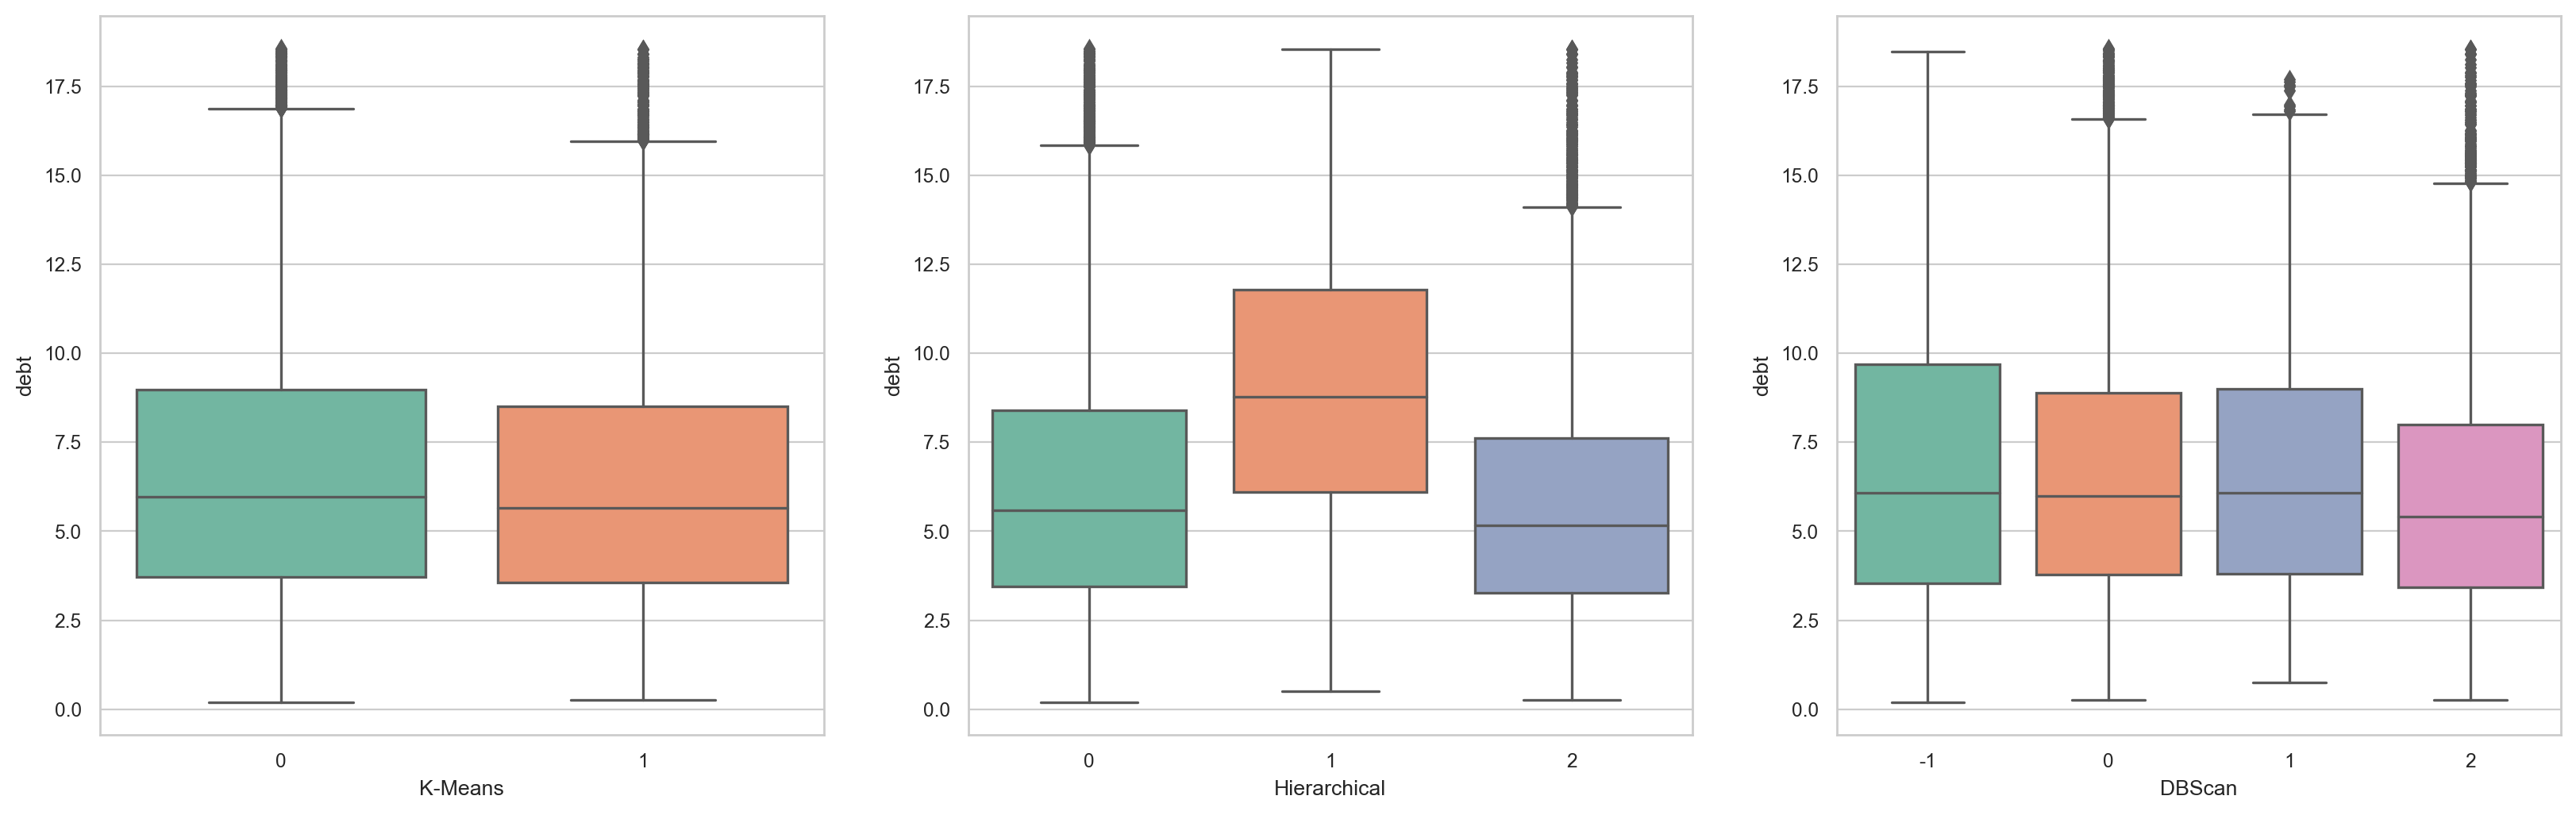

In [112]:
plot_boxplot(y='debt')

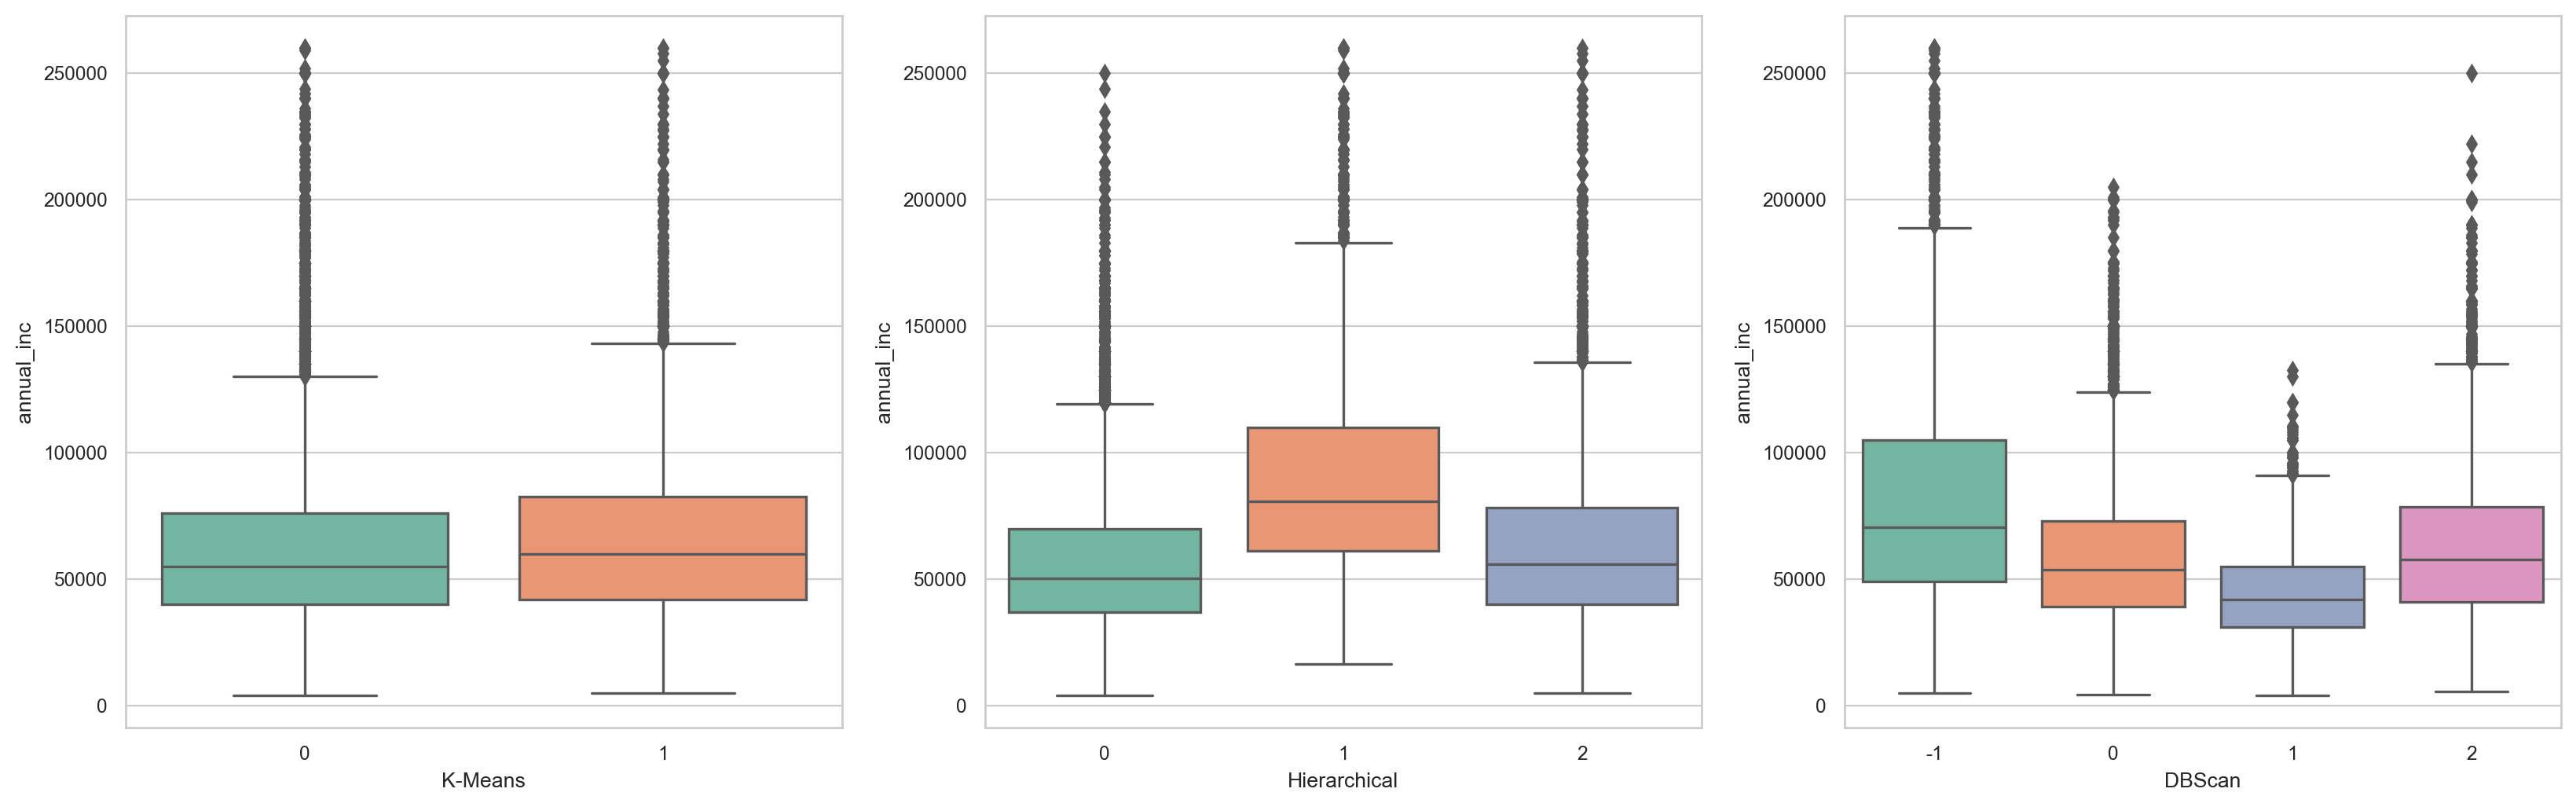

In [113]:
plot_boxplot(y='annual_inc')

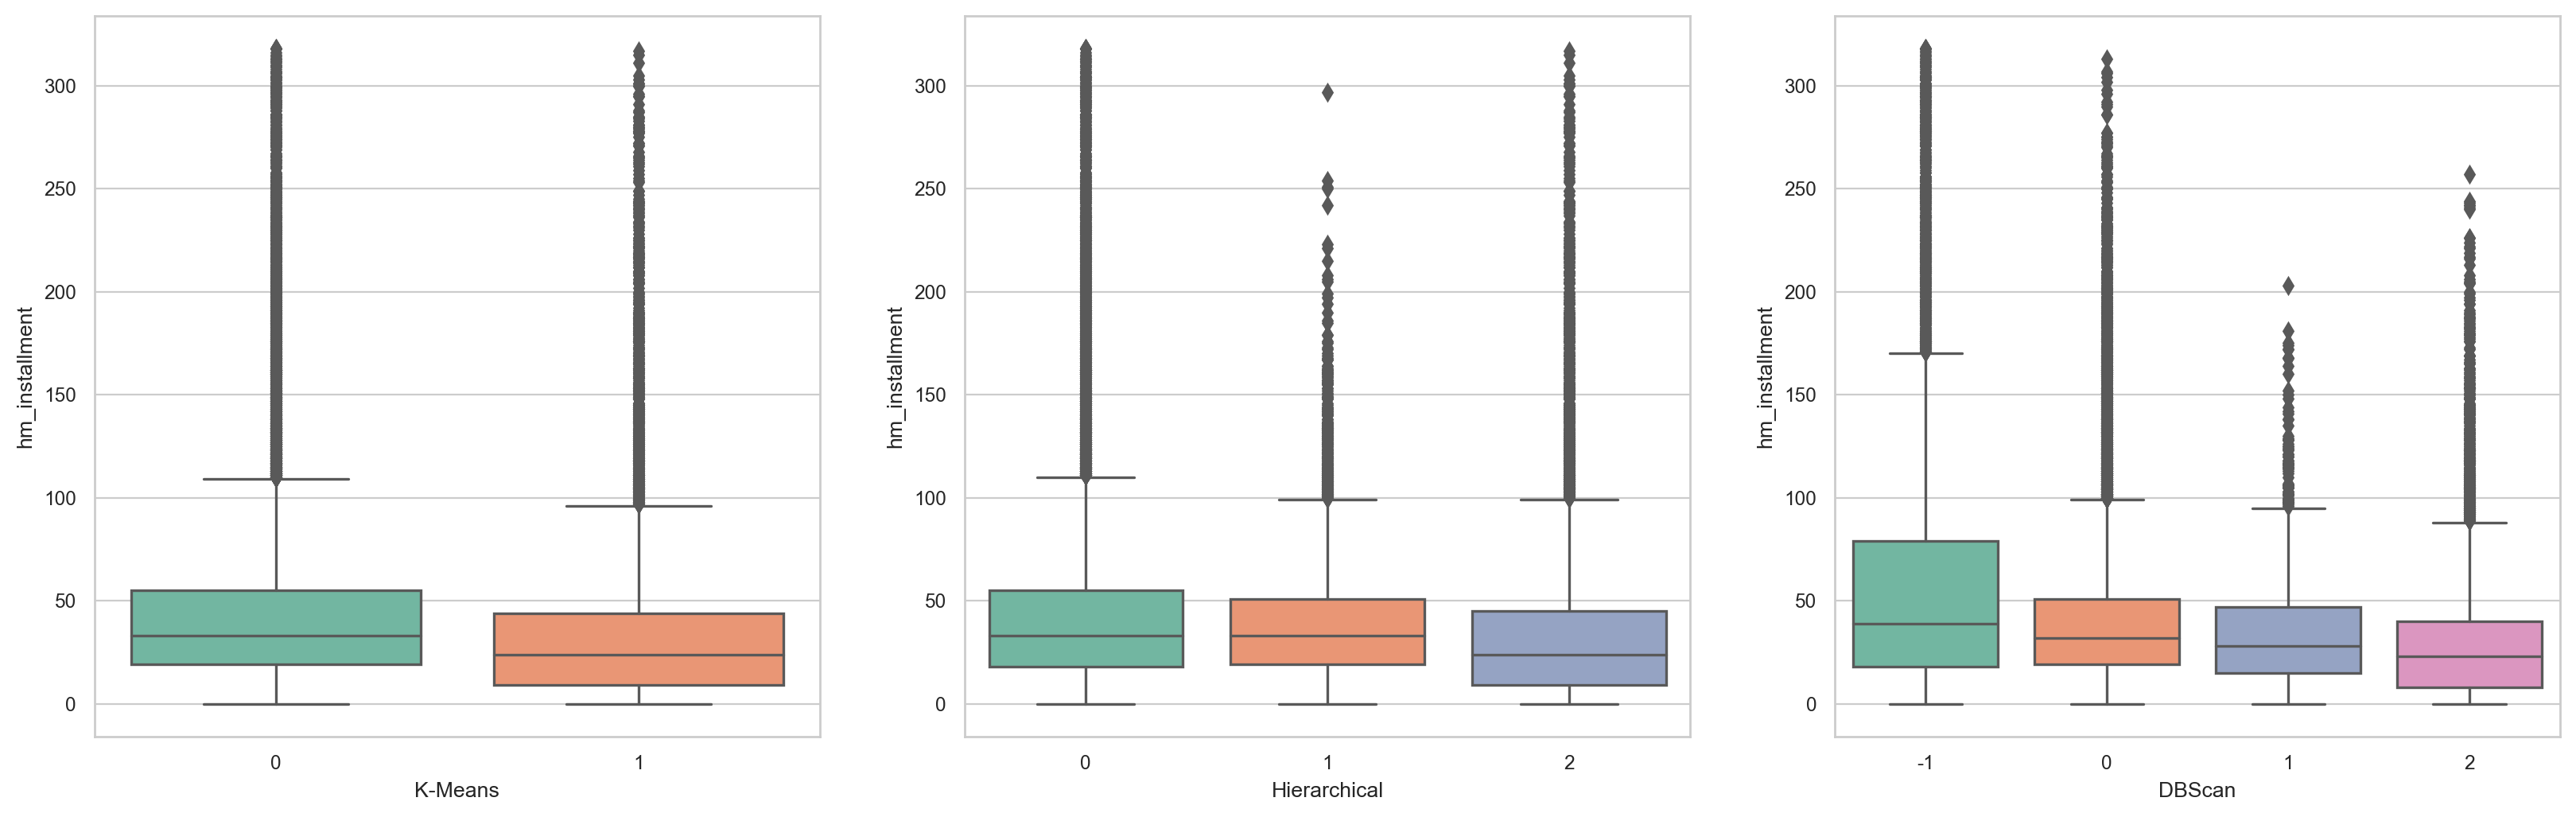

In [114]:
plot_boxplot(y='hm_installment')

    Po przeanalizowaniu boxplotów na różnych danych widać, że metody K-Means i Hierarchiczna dosyć podobnie podzieliły dane. DBscan ma najwieksze różnice w poojemności klastów jednak nadal dane wydają się bardzo zbliżone do siebie

In [115]:
def plot_scatterplot(x,y):
    plt.figure(figsize=(20,20), dpi=200)
    claster=pd.DataFrame(ftm, columns=['','K-Means','Hierarchical','DBScan'])
    claster_columns=claster.columns
    for i in range (1,len(claster_columns)):
        plt.subplot(3,3,i)
        sns.scatterplot(x=x, y=y, data=ftm, hue=claster_columns[i], palette='Set2')

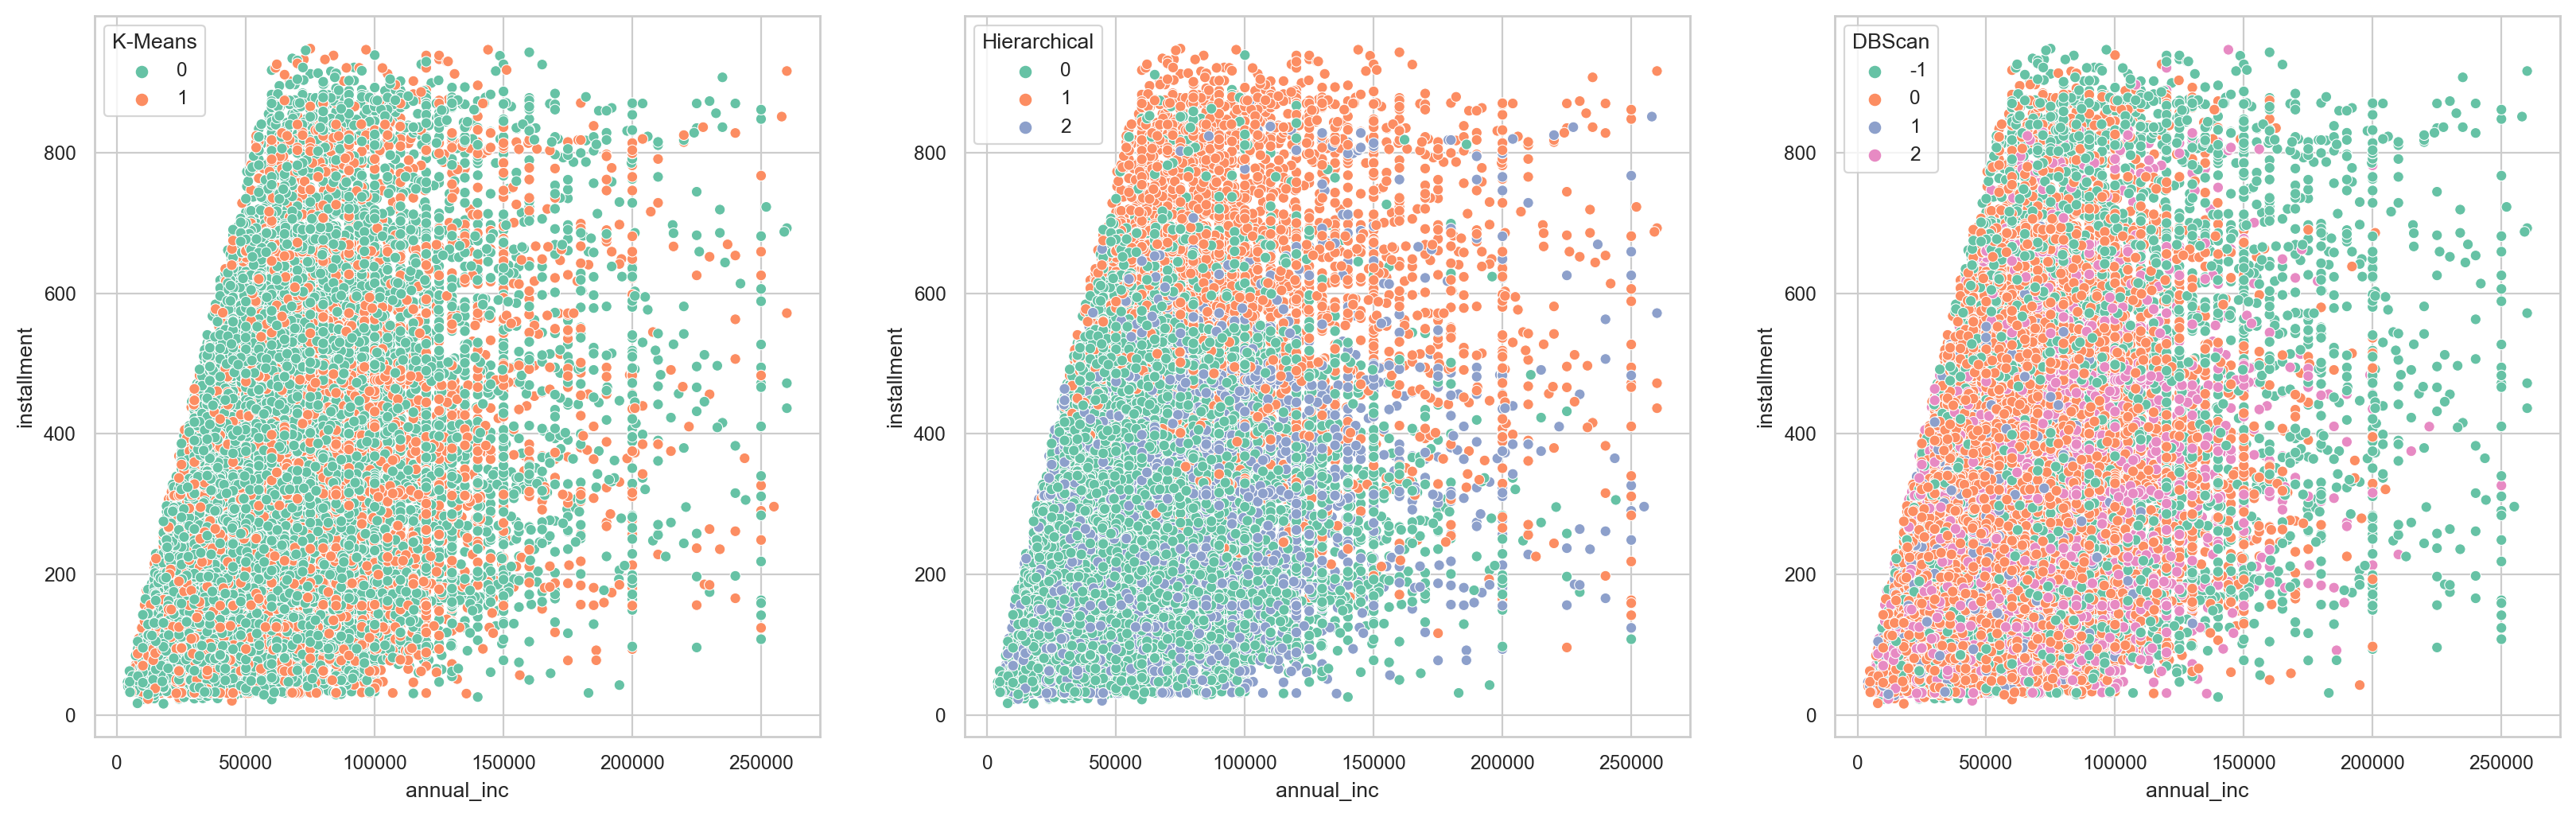

In [116]:
plot_scatterplot(x='annual_inc', y='installment')

In [117]:
# Przedstawienie zobowiązań spłaconych do niespłaconych w zależności od klastra w konkretnych metodach.

In [118]:
def plot_countplot(hue):
    plt.figure(figsize=(20,20), dpi=200)
    claster=pd.DataFrame(ftm, columns=['','K-Means','Hierarchical','DBScan'])
    claster_columns=claster.columns
    for i in range (1,len(claster_columns)):
        plt.subplot(3,3,i)
        sns.countplot(data=ftm, x=claster_columns[i], hue='loan_status', palette='Set2')

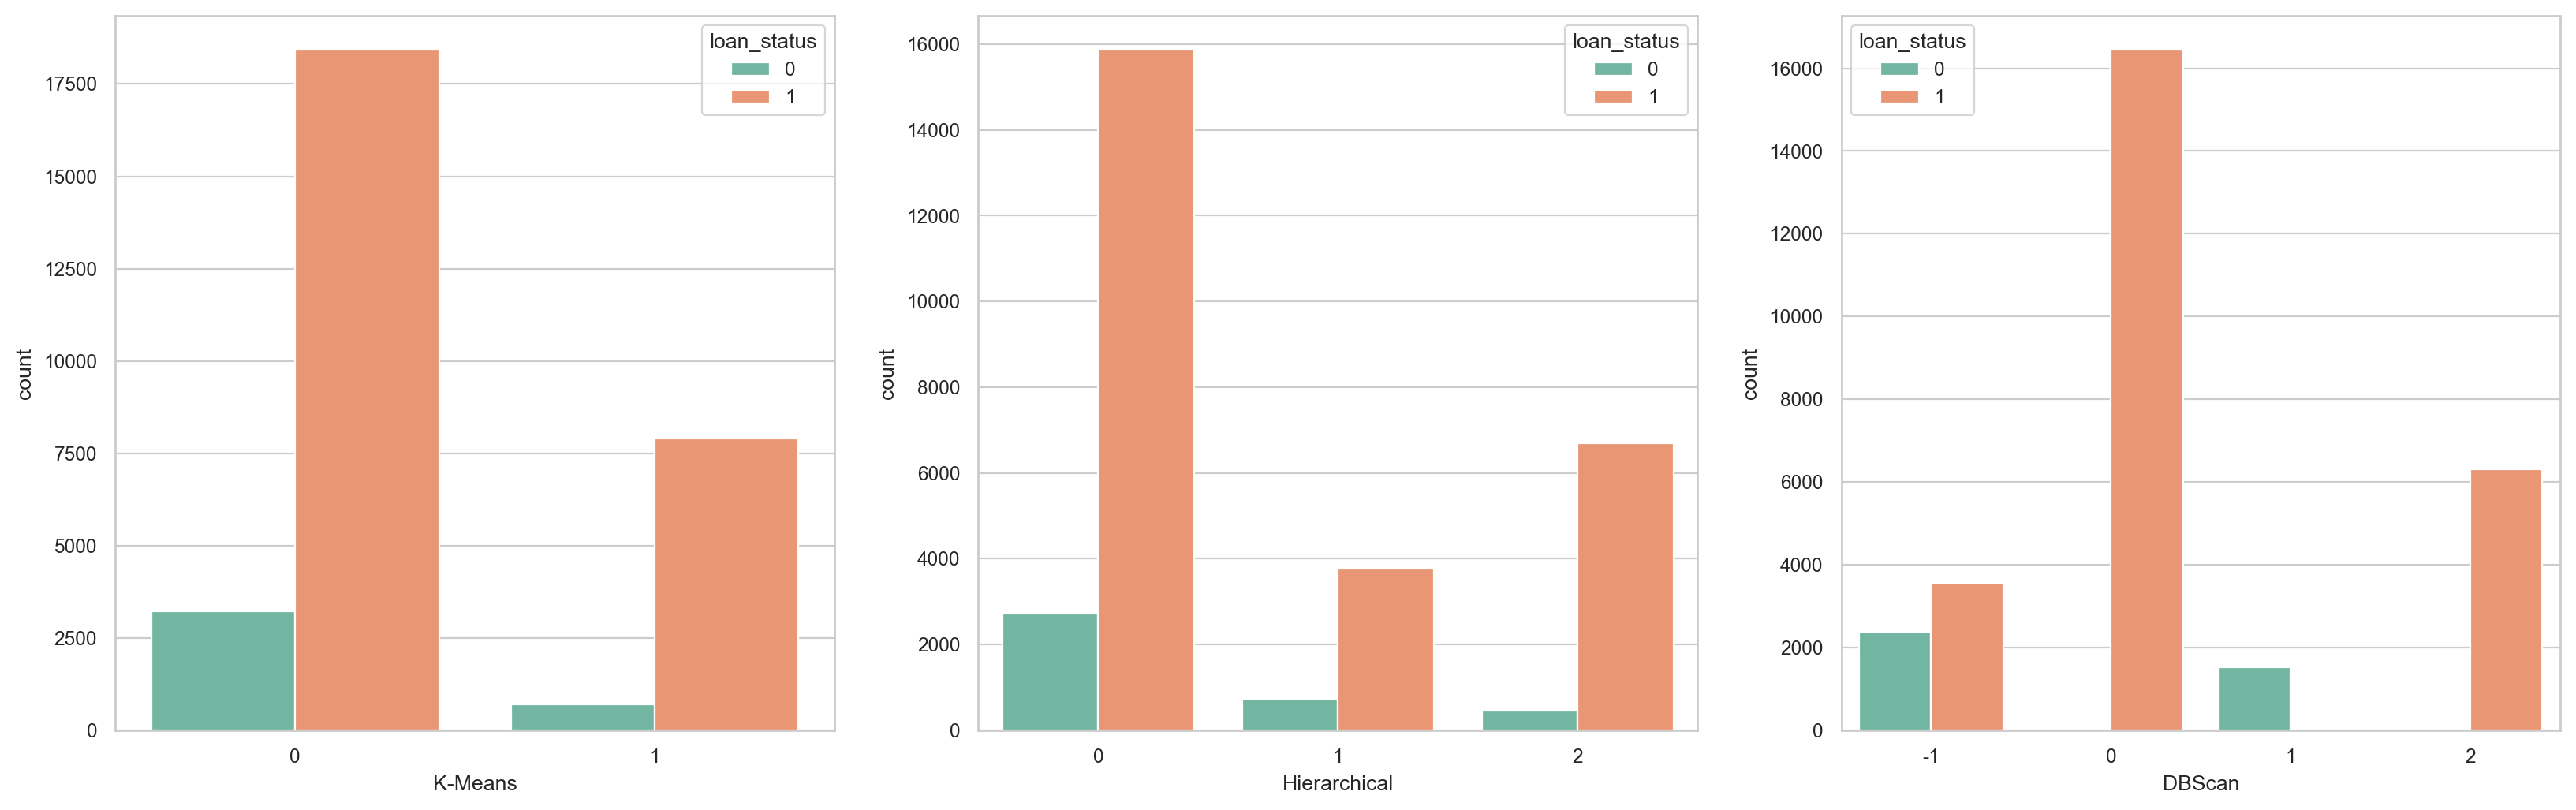

In [119]:
plot_countplot(hue='loan_status')

In [120]:
# W związku z tym, że wg klasyfikator DBScan wyodrębnił grupy klientów, którzy spłacili kredyt tworzę dodatkową kolumnę w bazowej 
# tabeli danych 'ftm' zawierająca dane z klasyfikatora DBScan: klasy 0 i 2 jako spłacone oznaczam '1', pozostałe jako '0'
ftm.replace({'DBScan':{-1: 0, 0: 1, 1: 0, 2: 1, 3: 0}}, inplace=True)

In [121]:
# usunięcie kolumn K-Means i Hierarchical przed trenowaniem danych jako nie wnoszące nic do analizy
ftm=ftm.drop(['K-Means', 'Hierarchical'], axis=1)

In [122]:
ftm

loan_amnt  funded_amnt  funded_amnt_inv  annual_inc  term  installment  \
0         5000.0       5000.0           4975.0     24000.0    36       162.87   
2         2400.0       2400.0           2400.0     12252.0    36        84.33   
3        10000.0      10000.0          10000.0     49200.0    36       339.31   
5         5000.0       5000.0           5000.0     36000.0    36       156.46   
6         7000.0       7000.0           7000.0     47004.0    60       170.08   
...          ...          ...              ...         ...   ...          ...   
39777     5000.0       5000.0            375.0     48000.0    36       161.25   
39779     5000.0       5000.0            250.0     85000.0    36       155.38   
39781     2500.0       2500.0           1075.0    110000.0    36        78.42   
39782     8500.0       8500.0            875.0     18000.0    36       275.38   
39783     5000.0       5000.0           1325.0    100000.0    36       156.84   

       int_rate  loan_age  inq_last_6mths  verification_status  ...  \
0         10.65        26             1.0                    2  ...   
2         15.96        10             2.0                    0  ...   
3         13.49        15             1.0                    1  ...   
5          7.90         7             3.0                    1  ...   
6         15.96         6             1.0                    0  ...   
...         ...       ...             ...                  ...  ...   
39777      9.96        16             1.0                    0  ...   
39779      7.43        14             0.0                    0  ...   
39781      8.07        21             0.0                    0  ...   
39782     10.28        25             1.0                    0  ...   
39783      8.07        13             0.0                    0  ...   

       is_consolidation  emp_length  home_ownership  loan_status   debt  \
0                     0        10.0               1            1   8.14   
2                     0        10.0               1            1   8.26   
3                     0        10.0               1            1   8.28   
5                     0         3.0               1            1   5.22   
6                     0         8.0               1            1   4.34   
...                 ...         ...             ...          ...    ...   
39777                 0         4.0               2            1   4.03   
39779                 0         1.0               3            1   2.19   
39781                 0         4.0               2            1   0.86   
39782                 0         3.0               1            1  18.36   
39783                 1         0.5               2            1   1.88   

       diff_loan  hm_installment  fico_good  fico_very_good  DBScan  
0            0.0            84.0          1               0       1  
2            0.0            35.0          1               0       1  
3            0.0            16.0          1               0       1  
5            0.0            51.0          1               0       1  
6            0.0           104.0          1               0       1  
...          ...             ...        ...             ...     ...  
39777        0.0           176.0          1               0       1  
39779        0.0             1.0          0               1       1  
39781        0.0            93.0          0               1       1  
39782        0.0            32.0          1               0       1  
39783        0.0            62.0          0               1       1  

[30238 rows x 27 columns]

# Trenowanie na modelach

In [123]:
# przygotowanie danych do trenowania
# rozdzielenie kolumn przed trenowaniem na modelach, kolumna 'loan_amnt'jako y
X=ftm.drop('loan_status', axis=1)
y=ftm['loan_status']

In [124]:
X.shape

(30238, 26)

In [125]:
y.shape

(30238,)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [127]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [128]:
y_pred = dt_model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o DT:',dt_model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o DT:',dt_model.score(X_test,y_test))
acc_DT=metrics.accuracy_score(y_test, y_pred)
print('Wydajność DT: ',acc_DT)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o DT: 1.0
Wynik na danych testowych w oparciu o DT: 0.9416887125220459
Wydajność DT:  0.9416887125220459
F1:  0.9666435462513399


In [129]:
wyniki = pd.DataFrame({'Model':['Decision Tree'], 'wynik': acc_DT},index={'1'})
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1  Decision Tree  0.941689

In [130]:
# Random Forest
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
y_pred = model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o RF:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o RF:',model.score(X_test,y_test))
acc_RF=metrics.accuracy_score(y_test, y_pred)
print('Wydajność RF: ',acc_RF)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o RF: 1.0
Wynik na danych testowych w oparciu o RF: 0.9591049382716049
Wydajność RF:  0.9591049382716049
F1:  0.9768168468412173


In [132]:
wyniki_RF= pd.DataFrame({'Model':['Random Forest'], 'wynik': acc_RF},index={'2'})

wyniki = pd.concat([wyniki, wyniki_RF])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1  Decision Tree  0.941689
2  Random Forest  0.959105

In [133]:
# Gradient Boost
model=GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [134]:
y_pred = model.predict(X_test)

print('Wynik na danych szkoleniowych w oparciu o GB:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o GB:',model.score(X_test,y_test))
acc_GB=metrics.accuracy_score(y_test, y_pred)
print('Wydajność GB: ',acc_GB)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o GB: 0.9615420958140414
Wynik na danych testowych w oparciu o GB: 0.9613095238095238
Wydajność GB:  0.9613095238095238
F1:  0.9779148052601774


In [135]:
wyniki_GB= pd.DataFrame({'Model':['Gradient Boost'], 'wynik': acc_GB},index={'3'})

wyniki = pd.concat([wyniki, wyniki_GB])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1   Decision Tree  0.941689
2   Random Forest  0.959105
3  Gradient Boost  0.961310

In [136]:
# Ada Boost
model=AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [137]:
y_pred = model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o AB:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o AB:',model.score(X_test,y_test))
acc_AB=metrics.accuracy_score(y_test, y_pred)
print('Wydajność AB: ',acc_AB)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o AB: 0.9546442407634886
Wynik na danych testowych w oparciu o AB: 0.9573412698412699
Wydajność AB:  0.9573412698412699
F1:  0.9755326547385724


In [138]:
wyniki_AB= pd.DataFrame({'Model':['Ada Boost'], 'wynik': acc_AB},index={'4'})

wyniki = pd.concat([wyniki, wyniki_AB])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1   Decision Tree  0.941689
2   Random Forest  0.959105
3  Gradient Boost  0.961310
4       Ada Boost  0.957341

In [139]:
# Bagging
model=BaggingClassifier()
model.fit(X_train, y_train)

BaggingClassifier()

In [140]:
y_pred = model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o B:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o B:',model.score(X_test,y_test))
acc_B=metrics.accuracy_score(y_test, y_pred)
print('Wydajność B: ',acc_B)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o B: 0.998440895776245
Wynik na danych testowych w oparciu o B: 0.9557980599647267
Wydajność B:  0.9557980599647267
F1:  0.9747687661234505


In [141]:
wyniki_B= pd.DataFrame({'Model':['Bagging'], 'wynik': acc_B},index={'5'})

wyniki = pd.concat([wyniki, wyniki_B])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1   Decision Tree  0.941689
2   Random Forest  0.959105
3  Gradient Boost  0.961310
4       Ada Boost  0.957341
5         Bagging  0.955798

#    Skompresowanie danych

In [142]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [143]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [144]:
X_scaled_df.head()

loan_amnt  funded_amnt  funded_amnt_inv  annual_inc      term  installment  \
0  -0.856738    -0.850017        -0.783446   -1.157329 -0.574015    -0.787420   
1  -1.261617    -1.255724        -1.188492   -1.502178 -0.574015    -1.208649   
2  -0.078123    -0.069812         0.006984   -0.417611 -0.574015     0.158872   
3  -0.856738    -0.850017        -0.779514   -0.805082 -0.574015    -0.821798   
4  -0.545292    -0.537935        -0.464915   -0.482072  1.742114    -0.748751   

   int_rate  loan_age  inq_last_6mths  verification_status  ...  open_acc  \
0 -0.231033  1.799226        0.191048             1.348757  ... -1.486276   
1  1.327458 -0.599081        1.202946            -1.007798  ... -1.735623   
2  0.602510  0.150390        0.191048             0.170480  ...  0.259151   
3 -1.038162 -1.048763        2.214843             0.170480  ...  0.009805   
4  1.327458 -1.198658        0.191048            -1.007798  ... -0.488889   

   is_consolidation  emp_length  home_ownership      debt  diff_loan  \
0         -0.533011    1.512221       -0.897774  0.419326   0.130203   
1         -0.533011    1.512221       -0.897774  0.451447   0.130203   
2         -0.533011    1.512221       -0.897774  0.456801   0.130203   
3         -0.533011   -0.501651       -0.897774 -0.362294   0.130203   
4         -0.533011    0.936829       -0.897774 -0.597851   0.130203   

   hm_installment  fico_good  fico_very_good    DBScan  
0        0.893839   0.629821       -0.629821  0.573404  
1       -0.184375   0.629821       -0.629821  0.573404  
2       -0.602458   0.629821       -0.629821  0.573404  
3        0.167695   0.629821       -0.629821  0.573404  
4        1.333926   0.629821       -0.629821  0.573404  

[5 rows x 26 columns]

In [145]:
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [146]:
pca.components_[0]

array([ 0.38530186,  0.38548076,  0.37455179,  0.17164669,  0.17536227,
        0.365713  ,  0.24222778,  0.0821311 ,  0.02147684,  0.19238363,
        0.09494436,  0.23190592, -0.09602585, -0.10162535,  0.21711361,
        0.13640454,  0.11851158,  0.10082401,  0.08484013,  0.04294672,
        0.2079625 , -0.00934705, -0.02803456,  0.10162535, -0.10162535,
       -0.14031081])

In [147]:
pca.explained_variance_ratio_

array([2.15153224e-01, 1.83965333e-01, 1.04981422e-01, 6.14618456e-02,
       5.07949532e-02, 4.50169178e-02, 4.18741273e-02, 3.84182543e-02,
       3.76359379e-02, 3.51336656e-02, 3.09691032e-02, 3.03660225e-02,
       2.80080817e-02, 2.32553700e-02, 2.06707507e-02, 2.04643423e-02,
       1.13878390e-02, 6.26371437e-03, 4.99433439e-03, 4.47072955e-03,
       2.44687350e-03, 1.79450735e-03, 4.72651811e-04, 3.46725298e-33,
       1.83198743e-33, 1.61983224e-33])

In [148]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.21515322, 0.39911856, 0.50409998, 0.56556182, 0.61635678,
       0.66137369, 0.70324782, 0.74166608, 0.77930201, 0.81443568,
       0.84540478, 0.87577081, 0.90377889, 0.92703426, 0.94770501,
       0.96816935, 0.97955719, 0.9858209 , 0.99081524, 0.99528597,
       0.99773284, 0.99952735, 1.        , 1.        , 1.        ,
       1.        ])

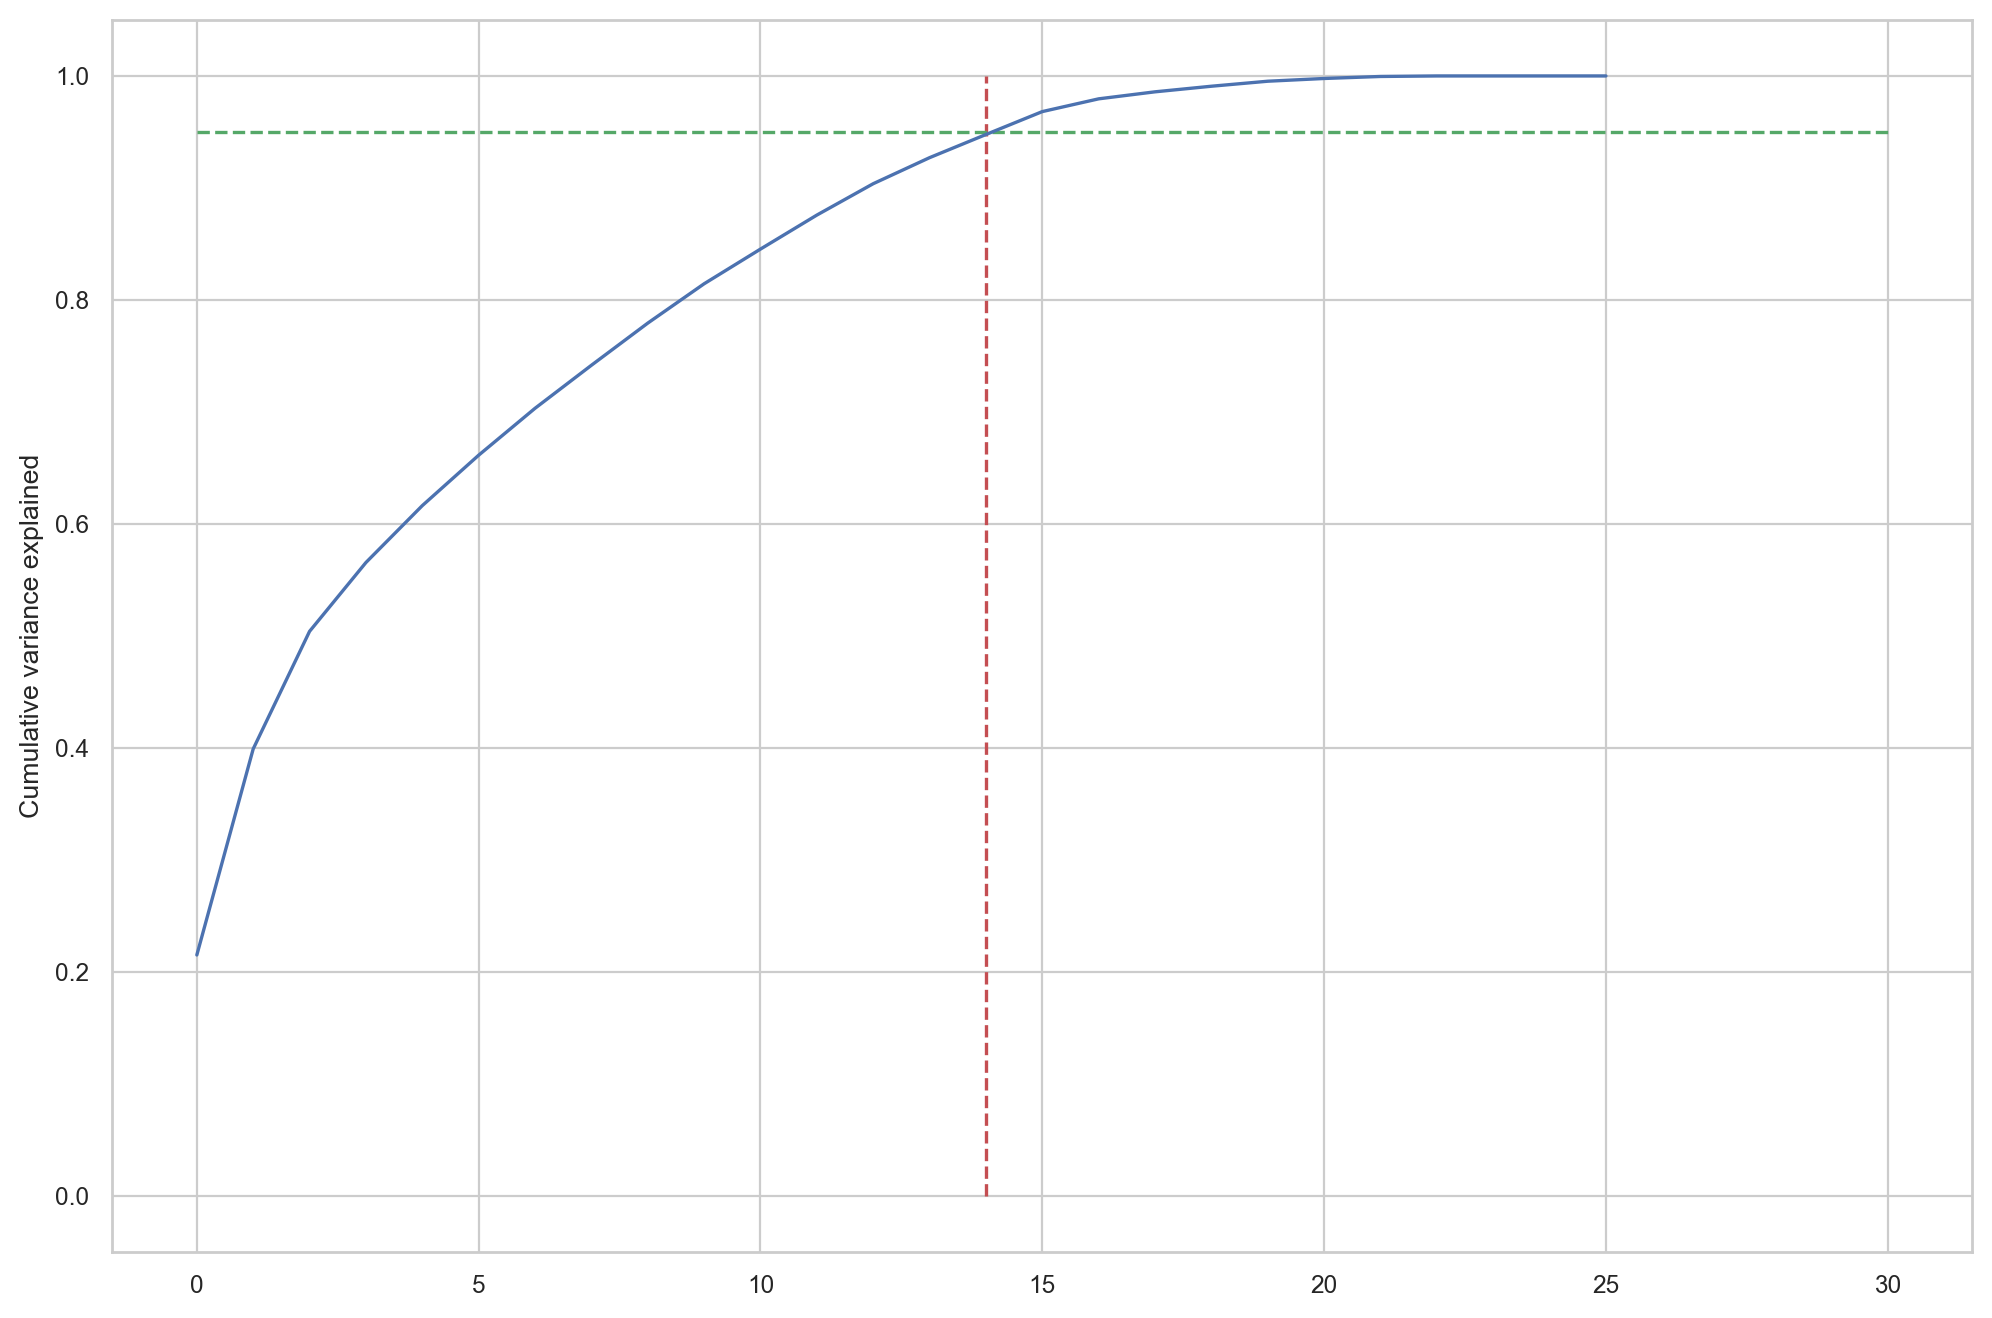

In [149]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=14, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [150]:
# Z wykresu skumulowanych danych można wywnioskować, że powyżej 13tej skadowej pozostałe niewiele wnoszą do analizy.
# W związku z tym, modyfikuję dane do analizy:
pca_final = IncrementalPCA(n_components=14)
X_pca_final = pca_final.fit_transform(X_scaled)

In [151]:
print(X.shape)
print(X_pca_final.shape)

(30238, 26)
(30238, 14)


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final,y, test_size = 0.3, random_state = 1)

#    Trenowanie na wybranych modelach po skompresowaniu danych

In [153]:
# Decision Tree po skumulowaniu danych
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [154]:
y_pred = dt_model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o DT:',dt_model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o DT:',dt_model.score(X_test,y_test))
acc_DT2=metrics.accuracy_score(y_test, y_pred)
print('Wydajność DT: ',acc_DT2)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o DT: 1.0
Wynik na danych testowych w oparciu o DT: 0.9327601410934744
Wydajność DT:  0.9327601410934744
F1:  0.9614265840394587


In [155]:
wyniki_DT2= pd.DataFrame({'Model':['Decision Tree 2'], 'wynik': acc_DT2},index={'6'})

wyniki = pd.concat([wyniki, wyniki_DT2])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1    Decision Tree  0.941689
2    Random Forest  0.959105
3   Gradient Boost  0.961310
4        Ada Boost  0.957341
5          Bagging  0.955798
6  Decision Tree 2  0.932760

In [156]:
# Random Forest po skumulowaniu danych
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [157]:
y_pred = model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o RF:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o RF:',model.score(X_test,y_test))
acc_RF2=metrics.accuracy_score(y_test, y_pred)
print('Wydajność RF: ',acc_RF2)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o RF: 1.0
Wynik na danych testowych w oparciu o RF: 0.9553571428571429
Wydajność RF:  0.9553571428571429
F1:  0.9748681352776916


In [158]:
wyniki_RF2= pd.DataFrame({'Model':['Random Forest 2'], 'wynik': acc_RF2},index={'7'})

wyniki = pd.concat([wyniki, wyniki_RF2])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1    Decision Tree  0.941689
2    Random Forest  0.959105
3   Gradient Boost  0.961310
4        Ada Boost  0.957341
5          Bagging  0.955798
6  Decision Tree 2  0.932760
7  Random Forest 2  0.955357

In [159]:
# Gradient Boost po skumulowaniu danych
model=GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [160]:
y_pred = model.predict(X_test)

print('Wynik na danych szkoleniowych w oparciu o GB:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o GB:',model.score(X_test,y_test))
acc_GB2=metrics.accuracy_score(y_test, y_pred)
print('Wydajność GB: ',acc_GB2)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o GB: 0.9578569403760748
Wynik na danych testowych w oparciu o GB: 0.9519400352733686
Wydajność GB:  0.9519400352733686
F1:  0.9727840199750313


In [161]:
wyniki_GB2= pd.DataFrame({'Model':['Gradient Boost'], 'wynik': acc_GB2},index={'8'})

wyniki = pd.concat([wyniki, wyniki_GB2])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1    Decision Tree  0.941689
2    Random Forest  0.959105
3   Gradient Boost  0.961310
4        Ada Boost  0.957341
5          Bagging  0.955798
6  Decision Tree 2  0.932760
7  Random Forest 2  0.955357
8   Gradient Boost  0.951940

In [162]:
# Ada Boost po skumulowaniu danych
model=AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [163]:
y_pred = model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o AB:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o AB:',model.score(X_test,y_test))
acc_AB2=metrics.accuracy_score(y_test, y_pred)
print('Wydajność AB: ',acc_AB2)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o AB: 0.9474156666351696
Wynik na danych testowych w oparciu o AB: 0.9443342151675485
Wydajność AB:  0.9443342151675485
F1:  0.9683445120040117


In [164]:
wyniki_AB2= pd.DataFrame({'Model':['Ada Boost'], 'wynik': acc_AB2},index={'9'})

wyniki = pd.concat([wyniki, wyniki_AB2])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1    Decision Tree  0.941689
2    Random Forest  0.959105
3   Gradient Boost  0.961310
4        Ada Boost  0.957341
5          Bagging  0.955798
6  Decision Tree 2  0.932760
7  Random Forest 2  0.955357
8   Gradient Boost  0.951940
9        Ada Boost  0.944334

In [165]:
# Bagging
model=BaggingClassifier()
model.fit(X_train, y_train)

BaggingClassifier()

In [166]:
y_pred = model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o B:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o B:',model.score(X_test,y_test))
acc_B2=metrics.accuracy_score(y_test, y_pred)
print('Wydajność B: ',acc_B2)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o B: 0.9974959841254842
Wynik na danych testowych w oparciu o B: 0.9508377425044092
Wydajność B:  0.9508377425044092
F1:  0.9719989954796584


In [167]:
wyniki_B2= pd.DataFrame({'Model':['Bagging'], 'wynik': acc_B2},index={'10'})

wyniki = pd.concat([wyniki, wyniki_B2])
wyniki = wyniki[['Model', 'wynik']]
wyniki

Model     wynik
1     Decision Tree  0.941689
2     Random Forest  0.959105
3    Gradient Boost  0.961310
4         Ada Boost  0.957341
5           Bagging  0.955798
6   Decision Tree 2  0.932760
7   Random Forest 2  0.955357
8    Gradient Boost  0.951940
9         Ada Boost  0.944334
10          Bagging  0.950838

In [168]:
# Z tabeli 'wyniki' można wywnioskować, że dane przed skompresowaniem były lepiej dopasowane i po skompresowaniu modele
# nie trenują z taką dokładnością jak wcześniej, jednak różnice są niewielkie

#    Poszerzona analiza wybranego modelu - Random Forest

In [169]:
# W związku z tym, że model miał lepsze wyniki na nieskompresowanych danych - na takich przeprowadze dalszą analizę

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [171]:
# Random Forest
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [172]:
y_pred = model.predict(X_test)
print('Wynik na danych szkoleniowych w oparciu o RF:',model.score(X_train,y_train))
print('Wynik na danych testowych w oparciu o RF:',model.score(X_test,y_test))
acc_RF=metrics.accuracy_score(y_test, y_pred)
print('Wydajność RF: ',acc_RF)
print('F1: ',metrics.f1_score(y_test, y_pred))

Wynik na danych szkoleniowych w oparciu o RF: 1.0
Wynik na danych testowych w oparciu o RF: 0.9608686067019401
Wydajność RF:  0.9608686067019401
F1:  0.9778000125070351


In [173]:
wynikiRF = pd.DataFrame({'Model':['Random Forest'], 'wynik': acc_RF},index={'1'})
wynikiRF = wynikiRF[['Model', 'wynik']]
wynikiRF

Model     wynik
1  Random Forest  0.960869

In [174]:
# zastosowanie walidacji krzyżowej

In [175]:
num_folds = 10
seed = 80
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9579007481442977
Standard Deviation:  0.002141699567989738


In [176]:
wyniki_RFKF= pd.DataFrame({'Model':['Random Forest k fold'], 'wynik': accuracy},index={'2'})

wynikiRF = pd.concat([wynikiRF, wyniki_RFKF])
wynikiRF = wynikiRF[['Model', 'wynik']]
wynikiRF

Model     wynik
1         Random Forest  0.960869
2  Random Forest k fold  0.957901

    Zastosowanie walidacji krzyzowej nieznacznie pogorszyło wynik trenowania

In [177]:
# wyliczenie AUROC score i wygenerowanie krzywej ROC

In [178]:
score_RA = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {score_RA:.6f}')

ROC AUC: 0.891733


In [179]:
wyniki_RA= pd.DataFrame({'Model':['ROC AUC'], 'wynik': score_RA},index={'3'})

wynikiRF = pd.concat([wynikiRF, wyniki_RA])
wynikiRF = wynikiRF[['Model', 'wynik']]
wynikiRF

Model     wynik
1         Random Forest  0.960869
2  Random Forest k fold  0.957901
3               ROC AUC  0.891733

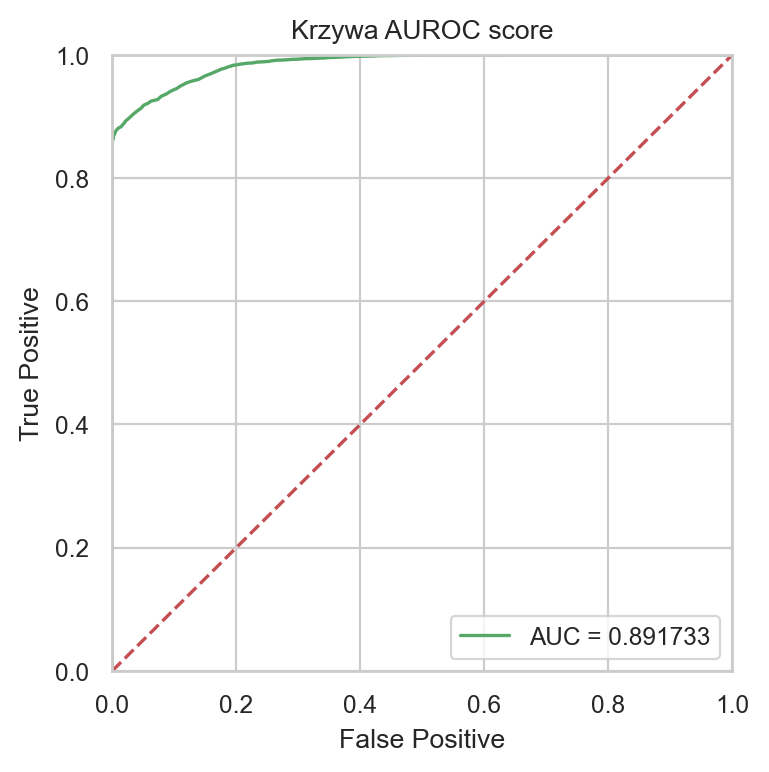

In [180]:
fig = plt.figure(figsize=[4,4],dpi=200)

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Krzywa AUROC score')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.6f' % score_RA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()


In [181]:
# wyliczenie dodatkowych metryk: avarange_precision_score, precision_score, recall_score

In [182]:
score_APS = average_precision_score(y_test, y_pred)
print(f'Averange Precision Score: {score_APS:.6f}')

Averange Precision Score: 0.970456


In [183]:
wyniki_APS= pd.DataFrame({'Model':['Averange Precision Score'], 'wynik': score_APS},index={'4'})

wynikiRF = pd.concat([wynikiRF, wyniki_APS])
wynikiRF = wynikiRF[['Model', 'wynik']]
wynikiRF

Model     wynik
1             Random Forest  0.960869
2      Random Forest k fold  0.957901
3                   ROC AUC  0.891733
4  Averange Precision Score  0.970456

In [184]:
score_PS = precision_score(y_test, y_pred)
print(f'Precision Score: {score_PS:.6f}')

Precision Score: 0.972025


In [185]:
wyniki_PS= pd.DataFrame({'Model':['Precision Score'], 'wynik': score_PS},index={'5'})

wynikiRF = pd.concat([wynikiRF, wyniki_PS])
wynikiRF = wynikiRF[['Model', 'wynik']]
wynikiRF

Model     wynik
1             Random Forest  0.960869
2      Random Forest k fold  0.957901
3                   ROC AUC  0.891733
4  Averange Precision Score  0.970456
5           Precision Score  0.972025

In [186]:
score_RS = recall_score(y_test, y_pred)
print(f'Recall Score: {score_RS:.6f}')

Recall Score: 0.983644


In [187]:
wyniki_RS= pd.DataFrame({'Model':['Recall Score'], 'wynik': score_RS},index={'6'})

wynikiRF = pd.concat([wynikiRF, wyniki_RS])
wynikiRF = wynikiRF[['Model', 'wynik']]
wynikiRF

Model     wynik
1             Random Forest  0.960869
2      Random Forest k fold  0.957901
3                   ROC AUC  0.891733
4  Averange Precision Score  0.970456
5           Precision Score  0.972025
6              Recall Score  0.983644

In [188]:
# wygenerowanie wykresu learning_curves

In [189]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [190]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

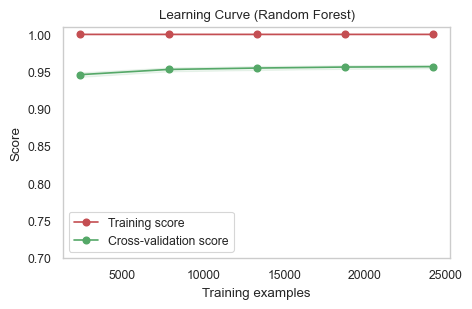

In [191]:
model = RandomForestClassifier(random_state=0)
plot_learning_curve(model, 'Learning Curve (Random Forest)', X, y, (0.7, 1.01), cv=cv, n_jobs=10)
plt.show()

    Wykres learning curve pokazuje, że model jest dobrze dopasowany.

In [192]:
# Sprawdzenie istotnych cech dla modelu RFC

In [193]:
model.fit(X_train , y_train)
print('Feature importances: \n',pd.DataFrame(model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                           Imp
loan_amnt            0.021233
funded_amnt          0.021379
funded_amnt_inv      0.025973
annual_inc           0.057109
term                 0.008134
installment          0.029269
int_rate             0.030682
loan_age             0.039205
inq_last_6mths       0.010856
verification_status  0.006697
dti                  0.026056
grade                0.012964
fico                 0.023744
fico_status          0.004194
revol_bal            0.042789
total_acc            0.031358
open_acc             0.024692
is_consolidation     0.007324
emp_length           0.013588
home_ownership       0.009060
debt                 0.030393
diff_loan            0.025773
hm_installment       0.032147
fico_good            0.007454
fico_very_good       0.005008
DBScan               0.452920


    Po sprawdzeniu ważności danych dla wybranego modelu trenowania widzimy, że niezbędną wręcz dla poprawności przewidywania i trenowania jest kolumna wyodrębniona na podstawie klastrowania metodą DBScan. W dalszej kolejności złoszony roczny dochód, wysokość odnawialnego salda kredytowego i co nie takie oczywiste kolumna mówiąca o różnicy pomiędzy kredytem wnioskowanym, a ostatecznie przyznanym.